<a href="https://colab.research.google.com/github/sayak-coding/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# <b><center>1.Importing Modules</b></center>

In [229]:
# import modules

# modules for dataframe 

import pandas as pd
import numpy as np 

# modules for data visualization

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# modules for machine learning

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn import ensemble

# model fiitings

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model, model_selection

# accuracy metrics

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import statsmodels.api as sm

# modules for ignore warnings

import warnings
warnings.filterwarnings("ignore")

# <b><center>2.Mounting Google Drives</b></center>

In [230]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <b><center>3.Import CSV Files</b></center>

In [231]:
# import csv files , we have two csv files 

rossmann_store = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone project/ML- Supervised Regression Capstone Project/CSV File/Rossmann Stores Data.csv")

store = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone project/ML- Supervised Regression Capstone Project/CSV File/store.csv")

# <b><center>4.Showing Details of our DataSet</b></center>

In [232]:
rossmann_store.head() # showing the details of first csv file

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [233]:
rossmann_store.shape # shape of rossmann stores data

(1017209, 9)

In [234]:
store.head() # showing the details of second csv file

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [235]:
store.shape # shape of stores data

(1115, 10)

In [236]:
rossmann_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [237]:
rossmann_store.isna().sum() # checking for null values

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [238]:
store.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [239]:
store.isna().sum() # checking for null values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# <b><center>5.Merging Two CSV Files - Final Dataset</b></center>

In [240]:
Rossmann_Sales=rossmann_store.merge(store,on=["Store"],how="outer") # merging two csv file on basis of the column "store"


In [241]:
Rossmann_Sales.head() # details of merged data set

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [242]:
# creating separate day, month, year column from date column 

Rossmann_Sales['Day'] = pd.DatetimeIndex(Rossmann_Sales['Date']).day
Rossmann_Sales['Month'] = pd.DatetimeIndex(Rossmann_Sales['Date']).month
Rossmann_Sales['Year'] = pd.DatetimeIndex(Rossmann_Sales['Date']).year

In [243]:
Rossmann_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,30,7,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,29,7,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,28,7,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,27,7,2015


In [244]:
 Rossmann_Sales.shape # shape of merged data set

(1017209, 21)

In [245]:
Rossmann_Sales.isna().sum() # checking for null values in our final data set 

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Month                             0
Year                              0
dtype: int64

# The columns "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval" have null values.

# <b><center>6.Dealing with null values </b></center>

In [246]:
Rossmann_Sales.CompetitionOpenSinceMonth.fillna(value =Rossmann_Sales['CompetitionOpenSinceMonth'].mode()[0] , inplace = True)
Rossmann_Sales.CompetitionOpenSinceYear.fillna(value =Rossmann_Sales['CompetitionOpenSinceYear'].mode()[0] , inplace = True)
Rossmann_Sales.CompetitionDistance.fillna(value =Rossmann_Sales['CompetitionDistance'].median() , inplace = True)
Rossmann_Sales.Promo2SinceWeek.fillna(value = 0 , inplace = True)
Rossmann_Sales.Promo2SinceYear.fillna(value = 0 , inplace = True)
Rossmann_Sales.PromoInterval.fillna(value = 0 , inplace = True)

# <b><center>7.Final Checking For Null Values</b></center>

In [247]:
Rossmann_Sales.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Month                        0
Year                         0
dtype: int64

In [248]:
Rossmann_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

# <b><center> Exploratory Data Analysis </b></center>

# <b><center>8.Distributions Of Categorical Features</b></center>

In [249]:
# Create a list with Categorical columns

Categorical_Features = ['Sales','Store','SchoolHoliday','Promo','Open','DayOfWeek','Customers','CompetitionDistance','CompetitionOpenSinceMonth',
                    'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']

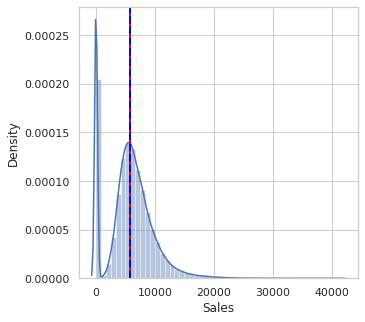

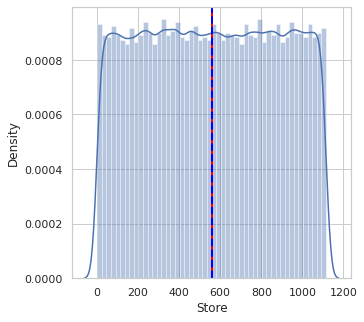

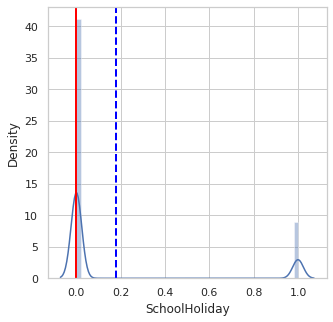

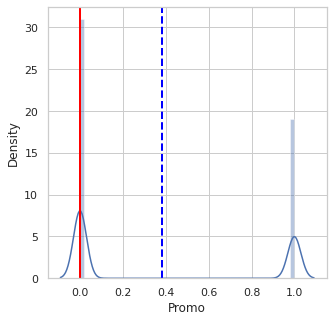

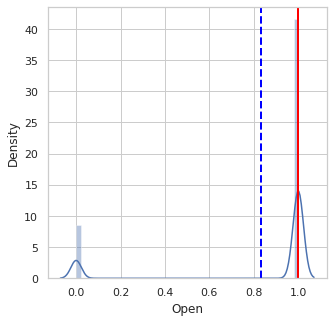

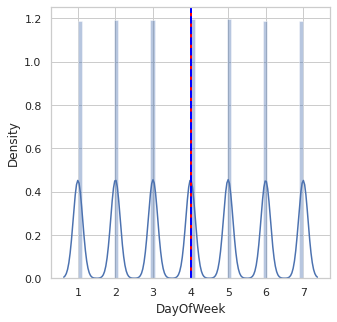

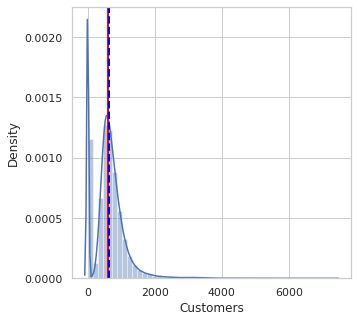

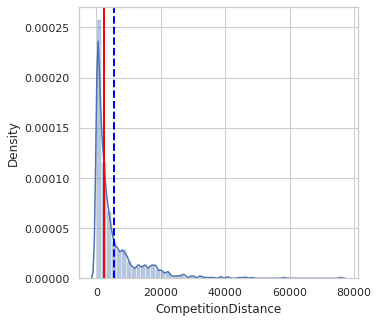

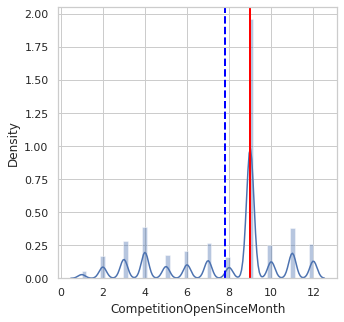

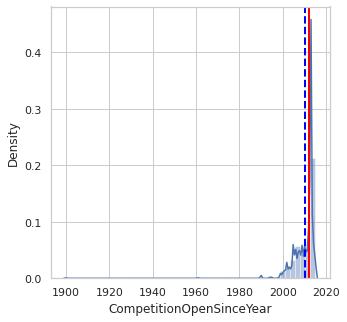

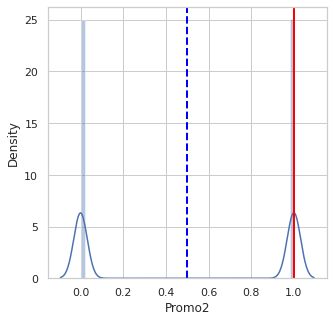

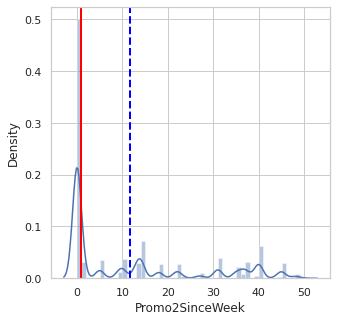

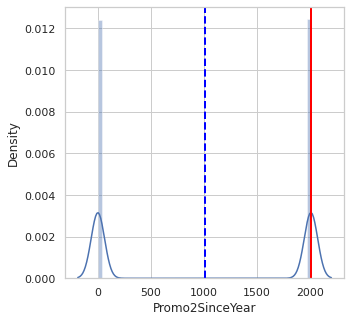

In [250]:
# Visualization - distribution of Categorical features
 
for column in Categorical_Features:
    plt.figure(figsize=(5,5))
    sns.distplot((Rossmann_Sales[column]))
    plt.axvline(x=Rossmann_Sales[column].median(),color='red',ls='-',lw=2)
    plt.axvline(x=Rossmann_Sales[column].mean(),color='blue',ls='--',lw=2)


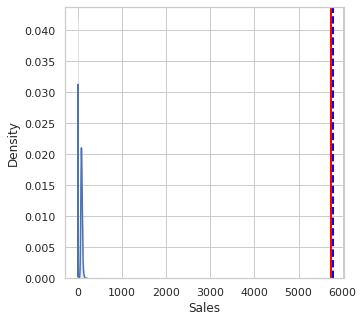

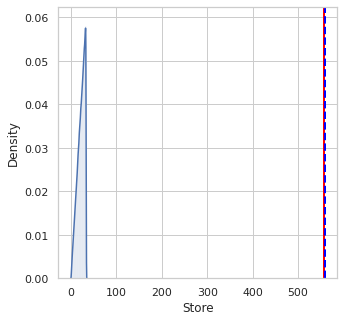

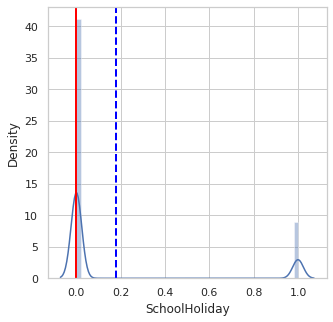

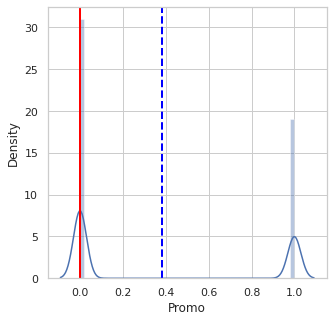

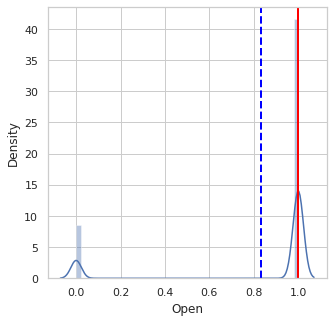

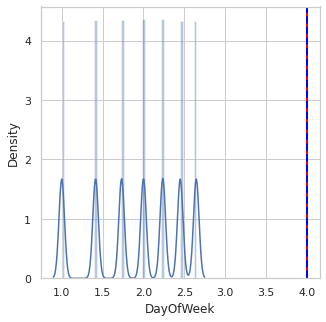

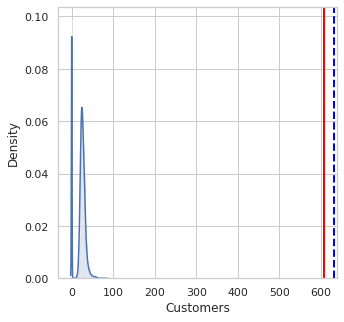

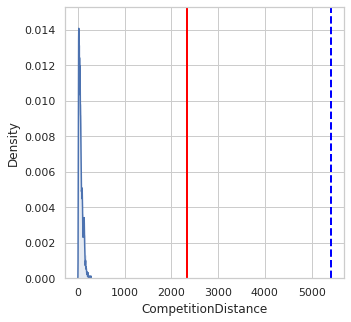

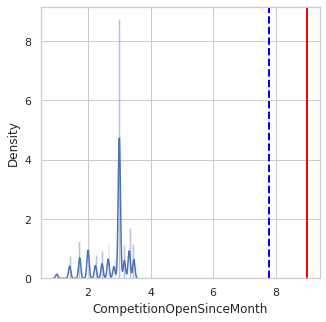

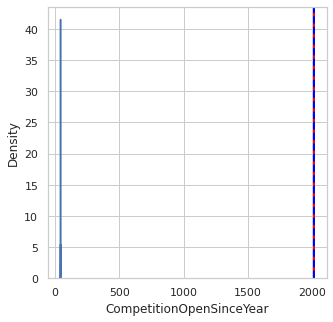

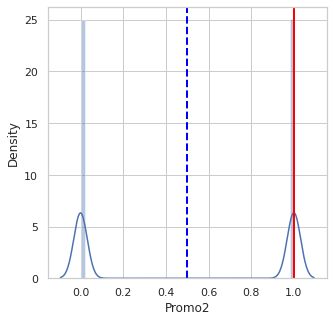

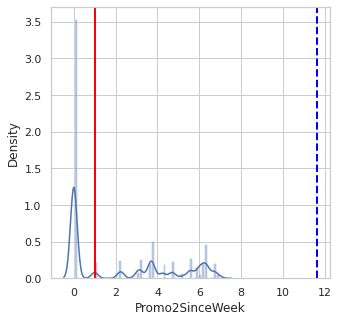

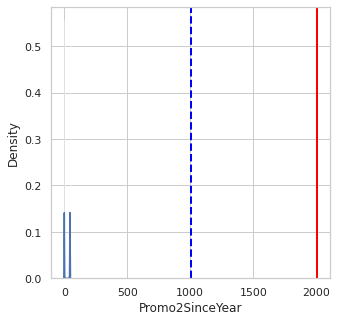

In [251]:
# some data is skewed , so apply square root to get normal distribution

for column in Categorical_Features:
    plt.figure(figsize=(5,5))
    sns.distplot(np.sqrt(Rossmann_Sales[column]))
    plt.axvline(x=Rossmann_Sales[column].median(),color='red',ls='-',lw=2)
    plt.axvline(x=Rossmann_Sales[column].mean(),color='blue',ls='--',lw=2)

# <b><center>9. Sale</b></center>

# <t>9.1.Average Sales Per Month</t>

In [252]:
Rossmann_Sales.groupby('Month')[["Sales"]].mean() # showing the average selling of each month

,Sales
Month,
1,5465.395529
2,5645.253150
3,5784.578871
4,5738.866916
5,5489.639973
6,5760.964375
7,6064.915711
8,5693.016554
9,5570.246033


In [253]:
Rossmann_Sales.groupby('Month')[["Sales"]].mean().idxmax() # Showing the maximum average selling month


Sales    12
dtype: int64

In [254]:
Rossmann_Sales.groupby('Month')[["Sales"]].mean().max() # Showing the maximum average sale

Sales    6826.611377
dtype: float64

In [255]:
Rossmann_Sales.groupby('Month')[["Sales"]].mean().idxmin() # Showing the minimum average selling month

Sales    1
dtype: int64

In [256]:
Rossmann_Sales.groupby('Month')[["Sales"]].mean().min() # Showing the minimum average sale

Sales    5465.395529
dtype: float64

Text(0.5, 1.0, 'Average Sales per Month')

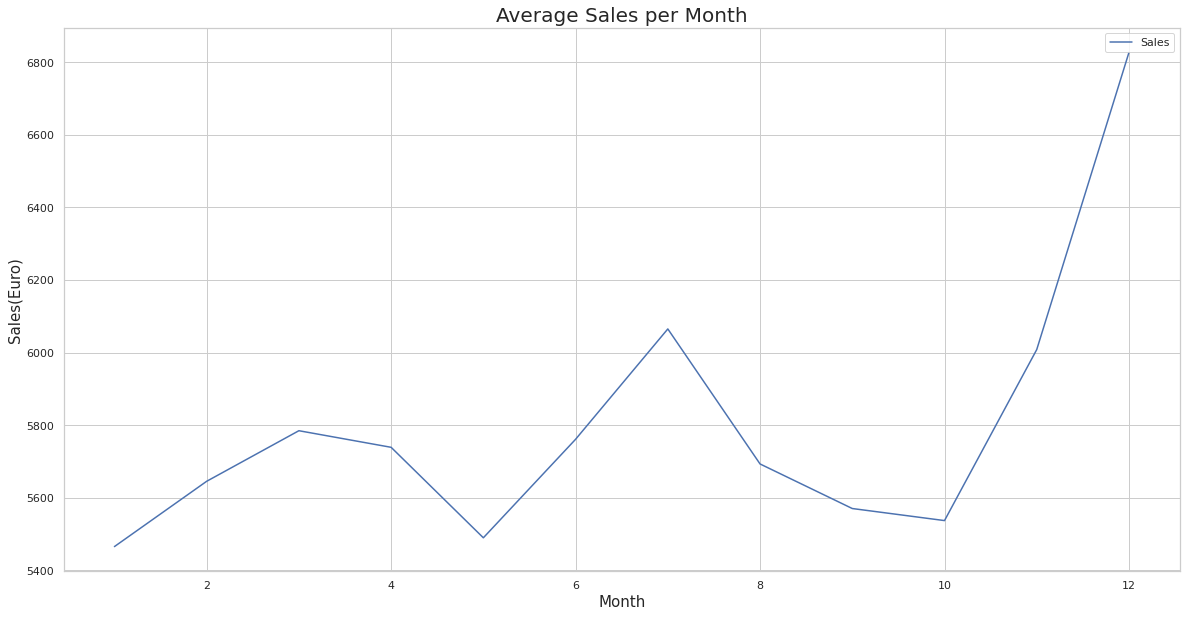

In [257]:
# Visualization

ax = Rossmann_Sales.groupby('Month')[["Sales"]].mean().plot(figsize=(20,10))
plt.xlabel("Month",size=15)
plt.ylabel("Sales(Euro)",size=15)
plt.title("Average Sales per Month",size = 20)

#<b><u> Conclusion</u> : </b> 
#The maximum average selling month is "December" and the amount of sale is 6826 euro. Where the minimum average selling month is "January" and the amount of sale is 5465 euro. 

# 9.2.Average Sales Per Year

In [258]:
Rossmann_Sales.groupby('Year')[["Sales"]].mean() # showing the average selling of each year

,Sales
Year,
2013,5658.533675
2014,5833.290704
2015,5878.245380


In [259]:
Rossmann_Sales.groupby('Year')[["Sales"]].mean().idxmax() # showing the average maximum selling year

Sales    2015
dtype: int64

In [260]:
Rossmann_Sales.groupby('Year')[["Sales"]].mean().max() # showing the maximum average sale

Sales    5878.24538
dtype: float64

In [261]:
Rossmann_Sales.groupby('Year')[["Sales"]].mean().idxmin() # showing the average minimum selling year

Sales    2013
dtype: int64

In [262]:
Rossmann_Sales.groupby('Year')[["Sales"]].mean().min() # showing the minimum average sale

Sales    5658.533675
dtype: float64

Text(0.5, 1.0, 'Average Sales per Year')

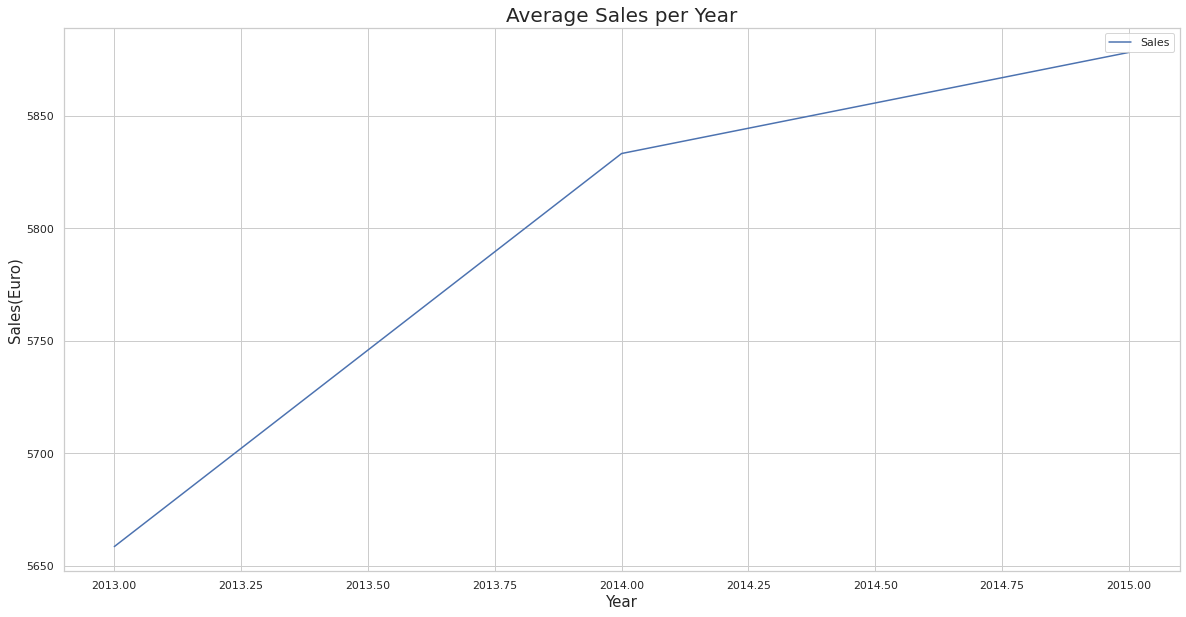

In [263]:
# Visualization

ax = Rossmann_Sales.groupby('Year')[["Sales"]].mean().plot(figsize=(20,10))
plt.xlabel("Year",size=15)
plt.ylabel("Sales(Euro)",size=15)
plt.title("Average Sales per Year",size = 20)

# <b><u>Conclusion</b></u> : 
#The maximum average selling year is "2015" and the amount of sale is 5878 euro. Where the minimum average selling year is "2013" and the amount of sale is  5658 euro.

# 9.3.Average Sales on Days of Week

In [264]:
Rossmann_Sales.groupby('DayOfWeek')[["Sales"]].mean() # Showing the average sale on days of a week

,Sales
DayOfWeek,
1,7809.044510
2,7005.244467
3,6555.884138
4,6247.575913
5,6723.274305
6,5847.562599
7,204.183189


In [265]:
Rossmann_Sales.groupby('DayOfWeek')[["Sales"]].mean().idxmax() # showing the maximum average selling day in a week 

Sales    1
dtype: int64

In [266]:
Rossmann_Sales.groupby('DayOfWeek')[["Sales"]].mean().max() # showing the maximum average selling amount

Sales    7809.04451
dtype: float64

In [267]:
Rossmann_Sales.groupby('DayOfWeek')[["Sales"]].mean().idxmin() # showing the minimum average selling day in a week

Sales    7
dtype: int64

In [268]:
Rossmann_Sales.groupby('DayOfWeek')[["Sales"]].mean().min() # showing the minimum average selling amount

Sales    204.183189
dtype: float64

Text(0.5, 1.0, 'Average Sales on Days of Week')

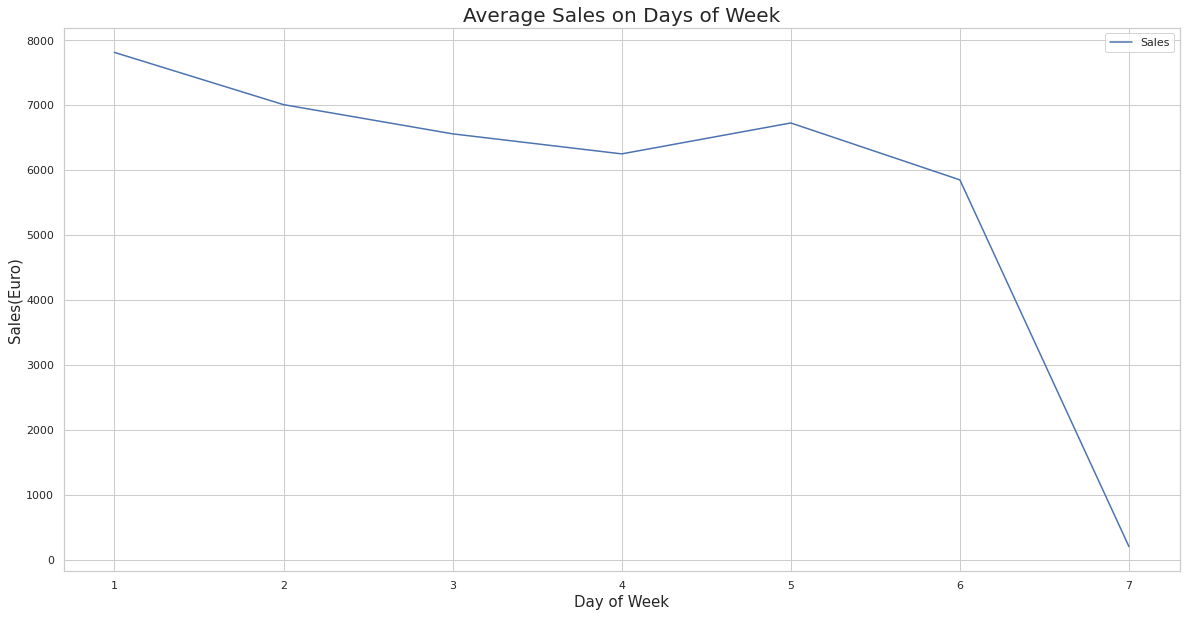

In [269]:
# Visualization

ax = Rossmann_Sales.groupby('DayOfWeek')[["Sales"]].mean().plot(figsize=(20,10))
plt.xlabel("Day of Week",size=15)
plt.ylabel("Sales(Euro)",size=15)
plt.title("Average Sales on Days of Week",size = 20)

# <b><u>Conclusion</u> :</b> 
#The maximum average selling day in a week is "Monday" and the amount of sale is 7809 euro. Where the minimum average selling day in a week is "Sunday" and the amount of sale is 204 euro.

# 9.4.Average Sales on Each Stores 

In [270]:
Rossmann_Sales.groupby('Store')[["Sales"]].mean() # showing the average selling of each store

,Sales
Store,
1,3945.704883
2,4122.991507
3,5741.253715
4,8021.769639
5,3867.110403
...,...
1111,4342.968153
1112,8465.280255
1113,5516.180467


In [271]:
Rossmann_Sales.groupby('Store')[["Sales"]].mean().idxmax() # showing the store id of the maximum average sale 

Sales    262
dtype: int64

In [272]:
Rossmann_Sales.groupby('Store')[["Sales"]].mean().max() # showing the maximum sale of the max store id

Sales    20718.515924
dtype: float64

In [273]:
Rossmann_Sales.groupby('Store')[["Sales"]].mean().idxmin() # showing the store id of the minimum average sale

Sales    307
dtype: int64

In [274]:
Rossmann_Sales.groupby('Store')[["Sales"]].mean().min() # showing the sminimum sale of the min store id 

Sales    2244.503185
dtype: float64

Text(0.5, 1.0, 'Average Sales on Each Stores')

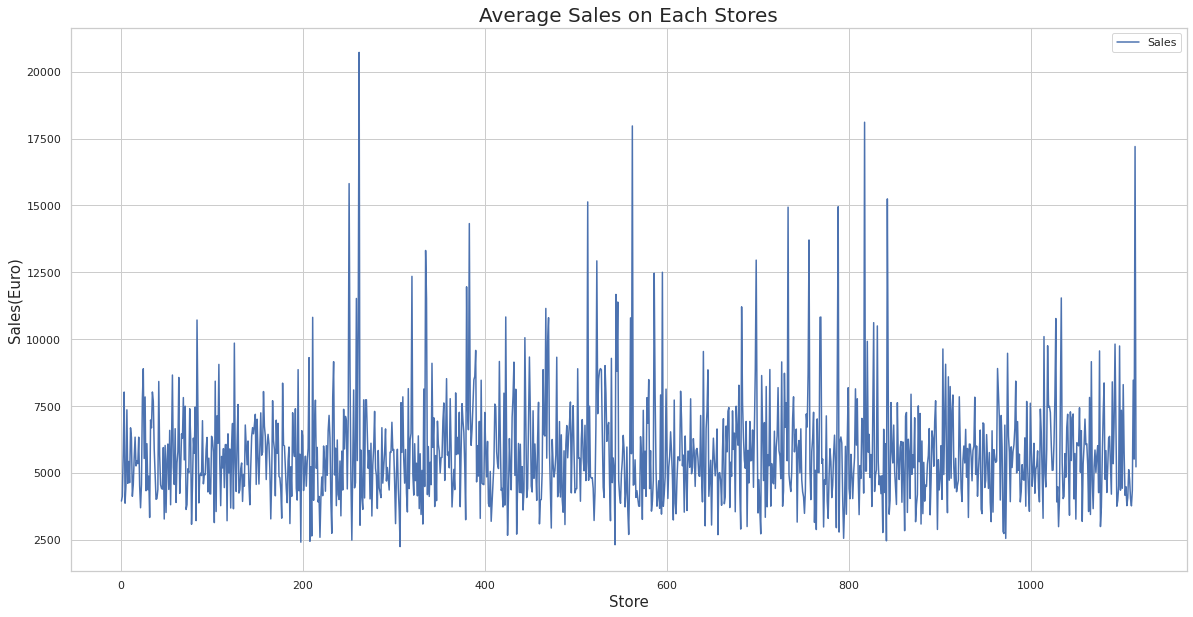

In [275]:
# Visualization

ax = Rossmann_Sales.groupby('Store')[["Sales"]].mean().plot(figsize=(20,10))
plt.xlabel("Store",size=15)
plt.ylabel("Sales(Euro)",size=15)
plt.title("Average Sales on Each Stores",size = 20)

# <b><u>Conclusion</u> :</b> 
#The maximum average selling store id is "262" and the amount of sale is 20718 euro. Where the minimum average selling store id  is "307" and the amount of sale is 2244 euro.

# 9.5.Average Sales on State Holiday

In [276]:
Rossmann_Sales.groupby('StateHoliday')[["Sales"]].mean() # Showing the average sale on state holiday

,Sales
StateHoliday,
0,5733.530624
0,5980.279717
a,290.735686
b,214.311510
c,168.733171


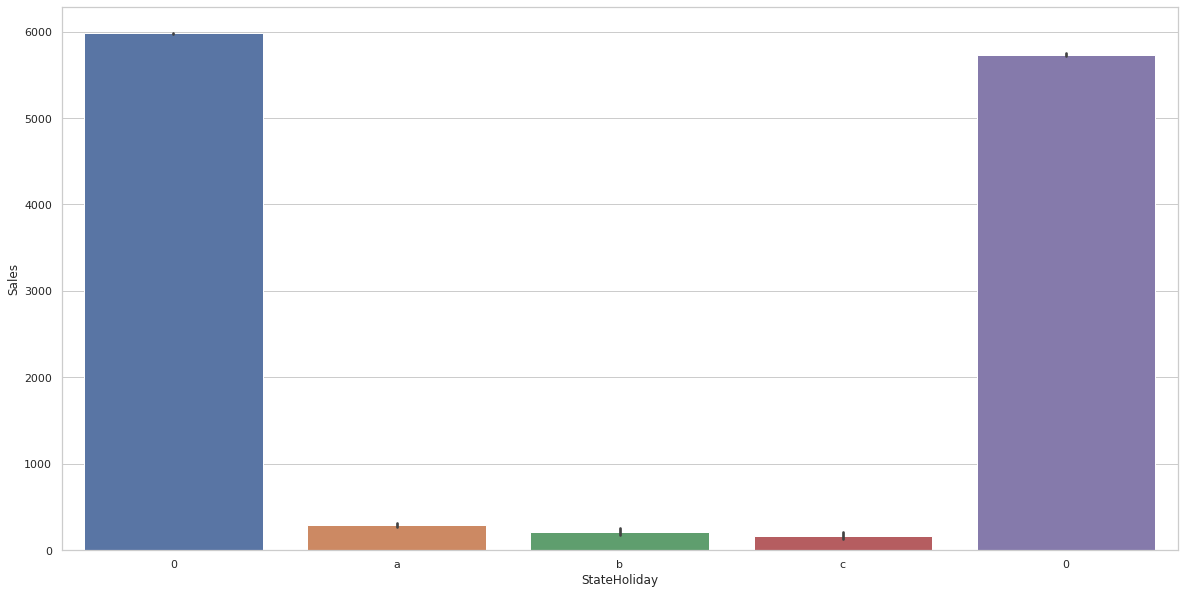

In [277]:
# visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='StateHoliday', y ='Sales', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b> 
#The minimum average sale is observed on "Christmas", and the amount of sale is only 168 euro.

# 9.6.Sales on School Holidays

In [278]:
Rossmann_Sales.groupby('SchoolHoliday')[["Sales"]].count() # Showing the number of School Holidays

,Sales
SchoolHoliday,
0,835488
1,181721


In [279]:
Rossmann_Sales.groupby('SchoolHoliday')[["Sales"]].mean() # Showing the average Sales on School Holidays

,Sales
SchoolHoliday,
0,5620.979034
1,6476.522207


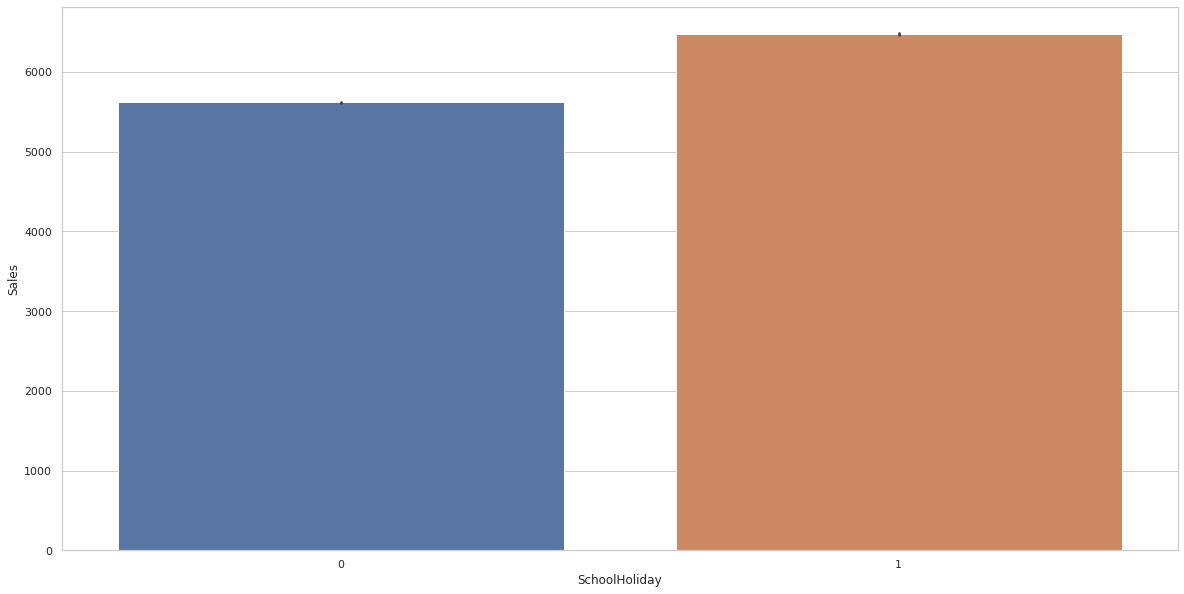

In [280]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='SchoolHoliday', y ='Sales', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b> 
#The average sale on school holiday is 6476 euro and the average sale on normal day is 5620 euro.

# 9.7.Sales on different kind of Storet types

In [281]:
Rossmann_Sales.groupby('StoreType')[["Sales"]].count() # Showing the number of different kind of Storet types


,Sales
StoreType,
a,551627
b,15830
c,136840
d,312912


In [282]:
Rossmann_Sales.groupby('StoreType')[["Sales"]].mean() # Showing the average Sales on different kind of Storet types

,Sales
StoreType,
a,5738.179710
b,10058.837334
c,5723.629246
d,5641.819243


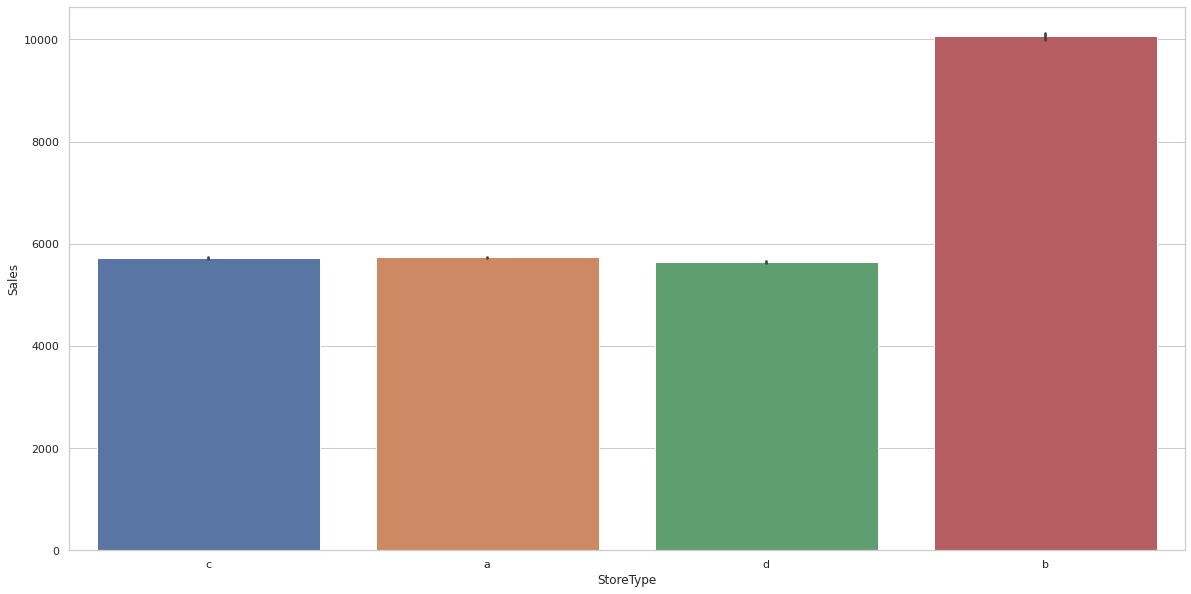

In [283]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='StoreType', y ='Sales', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b> 
#The maximum average sale observed on store type "b" and the average sale is 10058 euro. The average sale on others store is almost equal. 

# 9.8.Sales on different Assortments

In [284]:
Rossmann_Sales.groupby('Assortment')[["Sales"]].count() # Showing the count of different Assortments

,Sales
Assortment,
a,537445
b,8294
c,471470


In [285]:
Rossmann_Sales.groupby('Assortment')[["Sales"]].mean() # Showing the average Sales of different Assortments

,Sales
Assortment,
a,5481.026096
b,8553.931999
c,6058.676567


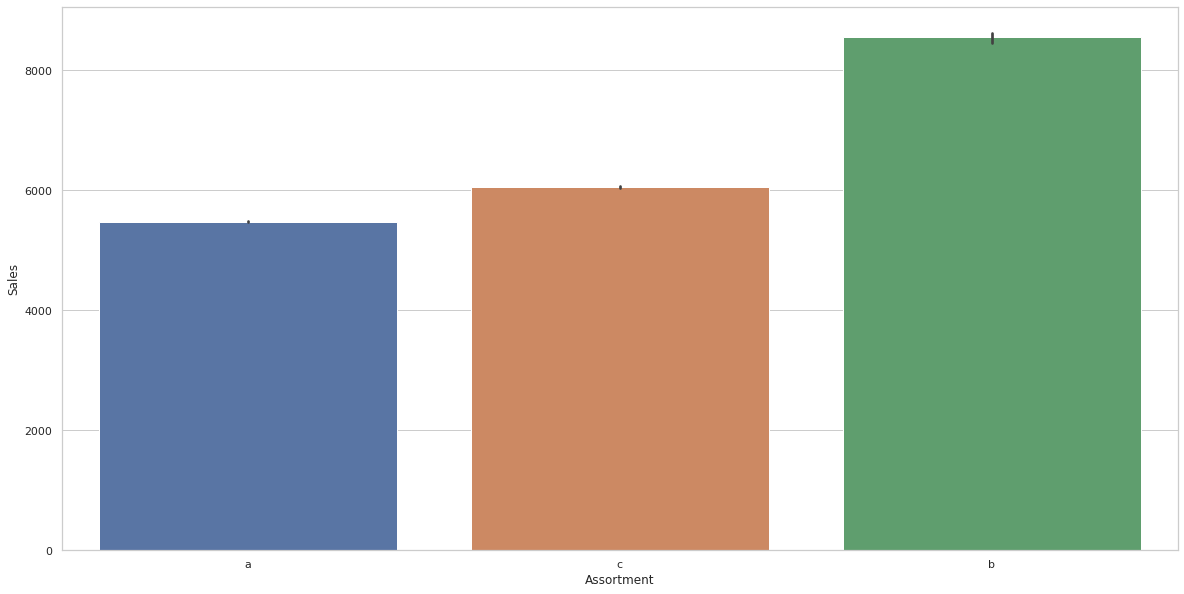

In [286]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='Assortment', y ='Sales', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b> 
#The maximum average sale observed on assortment type "b" and the average sale is 8553 euro.

# <b><center>10. Customers</b></center>

# 10.1. Average Customers Per Month 

In [287]:
Rossmann_Sales.groupby('Month')[["Customers"]].mean() # showing the number of average customer of each month

,Customers
Month,
1,601.617172
2,626.715129
3,629.401958
4,630.612945
5,601.991263
6,624.794091
7,656.629781
8,642.496979
9,634.438699


In [288]:
Rossmann_Sales.groupby('Month')[["Customers"]].mean().idxmax() # Showing the id of maximum number of average customer of each month

Customers    12
dtype: int64

In [289]:
Rossmann_Sales.groupby('Month')[["Customers"]].mean().max() # Showing the maximum number of average customer of max id month

Customers    703.067899
dtype: float64

In [290]:
Rossmann_Sales.groupby('Month')[["Customers"]].mean().idxmin() # Showing the id of minimum number of average customer of each month

Customers    1
dtype: int64

In [291]:
Rossmann_Sales.groupby('Month')[["Customers"]].mean().min() # Showing the minimum number of average customer of max id month

Customers    601.617172
dtype: float64

Text(0.5, 1.0, 'Number of Customers per Month')

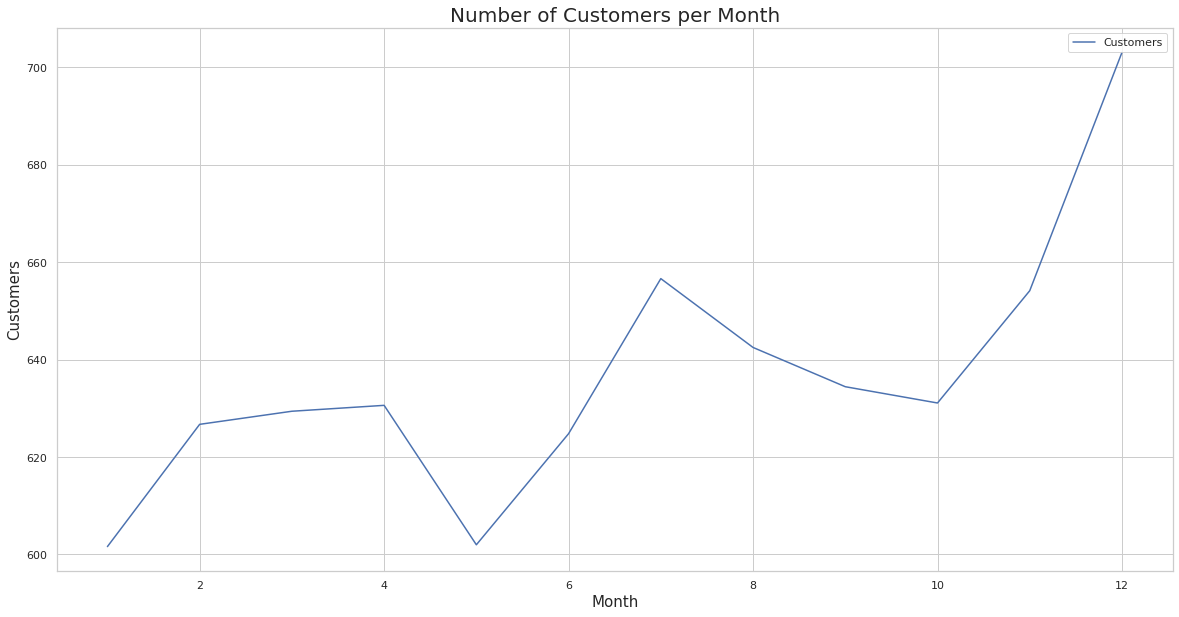

In [292]:
# Visualization

ax = Rossmann_Sales.groupby('Month')[["Customers"]].mean().plot(figsize=(20,10))
plt.xlabel("Month",size=15)
plt.ylabel("Customers",size=15)
plt.title("Number of Customers per Month",size = 20)

# <b><u>Conclusion</u> :</b>
# The maximum number of customers observed in the month "December" and the number of customers is on average 703. Where the minimum number of customers observed in the month "January" and the number of customers is on average 601.

# 10.2. Number of Average Customers Per Year

In [293]:
Rossmann_Sales.groupby('Year')[["Customers"]].mean() # showing the number of average customer of each year

,Customers
Year,
2013,629.043686
2014,643.268034
2015,624.199843


Text(0.5, 1.0, 'Number of Average Customers per Year')

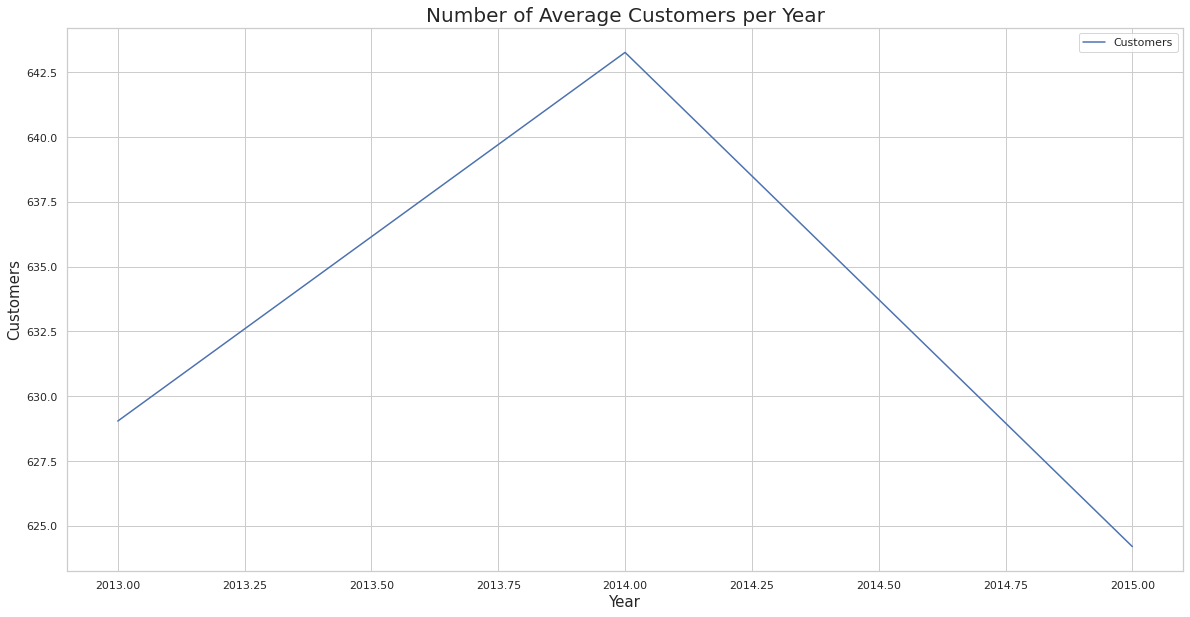

In [294]:
# Visualization

ax = Rossmann_Sales.groupby('Year')[["Customers"]].mean().plot(figsize=(20,10))
plt.xlabel("Year",size=15)
plt.ylabel("Customers",size=15)
plt.title("Number of Average Customers per Year",size = 20)

# <b><u>Conclusion</u> :</b>
# Here we see that the number of customers of every year almost same although number of customers in the year 2014 slightly increase, but in the next year the number of customers again decrease. 

# 10.3. Average Number of Customers on Day of Weeks

In [295]:
Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].count() # showing the number of customers on days of week

,Customers
DayOfWeek,
1,144730
2,145664
3,145665
4,145845
5,145845
6,144730
7,144730


In [296]:
Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].mean() # showing the average number of customers on days of week

,Customers
DayOfWeek,
1,813.065791
2,760.984615
3,721.639666
4,697.541486
5,743.150742
6,657.112237
7,35.786817


In [297]:
Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].mean().idxmax() # showing the day of maximimum number of customers on days of week

Customers    1
dtype: int64

In [298]:
Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].mean().max() # showing the maximum number of customers on max id day of week

Customers    813.065791
dtype: float64

In [299]:
Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].mean().idxmin() # showing the day of minimum number of customers on days of week

Customers    7
dtype: int64

In [300]:
Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].mean().min() # # showing the maximum number of customers on max id day of week

Customers    35.786817
dtype: float64

Text(0.5, 1.0, 'Average Number of Customers on Days of Week')

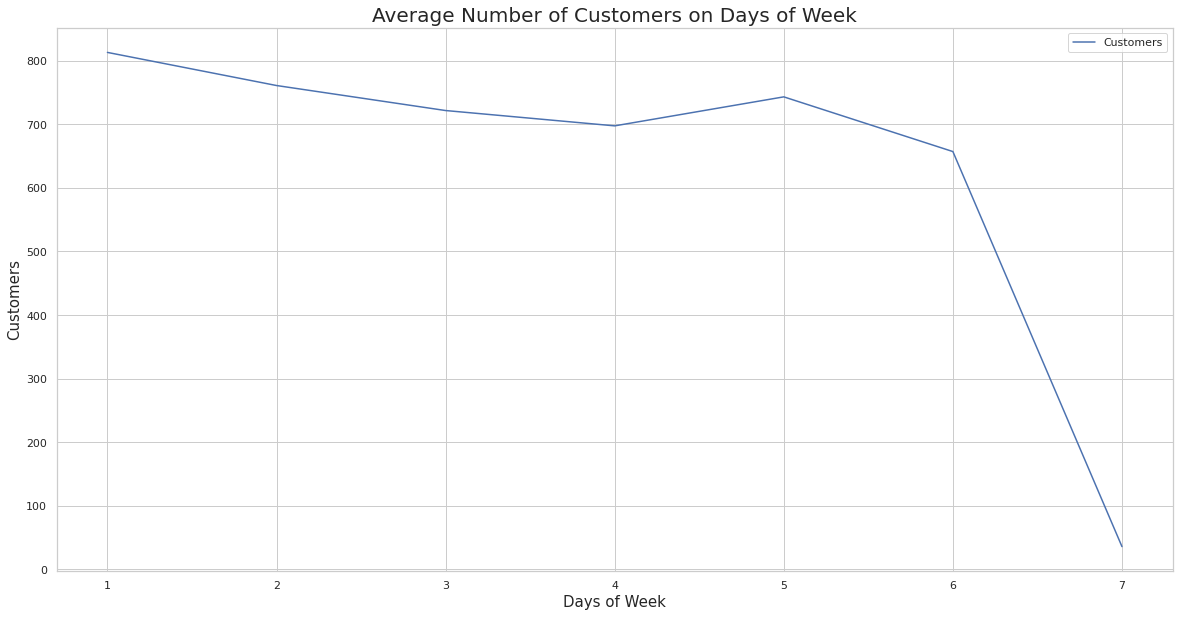

In [301]:
# Visualization

ax = Rossmann_Sales.groupby('DayOfWeek')[["Customers"]].mean().plot(figsize=(20,10))
plt.xlabel("Days of Week",size=15)
plt.ylabel("Customers",size=15)
plt.title("Average Number of Customers on Days of Week",size = 20)

# <b><u>Conclusion</u> :</b>
# The maximum average number of customers observed on " Monday" and the number of customers is 813. Where the minimum average number of customers observed on "Sunday" and the number of customers is only 35.

# 10.4. Average Number of Customers on Each Stores

In [302]:
Rossmann_Sales.groupby('Store')[["Customers"]].mean() # showing the average number of customers on each store

,Customers
Store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1111,373.548832
1112,693.498938
1113,596.763270


In [303]:
Rossmann_Sales.groupby('Store')[["Customers"]].mean().idxmax() # showing the id of the store where the number of customers is maximum

Customers    733
dtype: int64

In [304]:
Rossmann_Sales.groupby('Store')[["Customers"]].mean().max() # showing the maximum number of customers of max id

Customers    3403.458599
dtype: float64

In [305]:
Rossmann_Sales.groupby('Store')[["Customers"]].mean().idxmin() # showing the id of the store where the number of customers is minimum

Customers    543
dtype: int64

In [306]:
Rossmann_Sales.groupby('Store')[["Customers"]].mean().min() # showing the minimum number of customers of min id

Customers    199.132696
dtype: float64

Text(0.5, 1.0, 'Average Number of Customers on Each Stores')

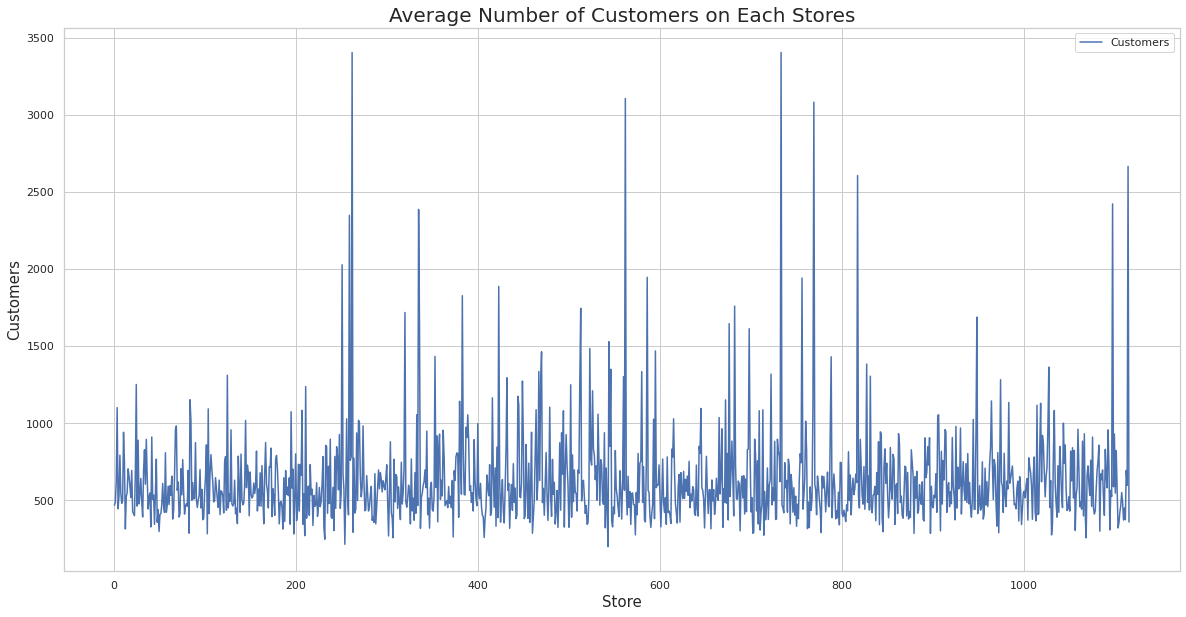

In [307]:
# Visualization

ax = Rossmann_Sales.groupby('Store')[["Customers"]].mean().plot(figsize=(20,10))
plt.xlabel("Store",size=15)
plt.ylabel("Customers",size=15)
plt.title("Average Number of Customers on Each Stores",size = 20)

# <b><u>Conclusion</u> :</b>
# The maximum number of customers observed in the store id "733" and the number of customers is 3403. Where the minimum number of customers observed in the store id "543" and the number of customers is 199.

# 10.5. Number of Customers on State Holidays

In [308]:
Rossmann_Sales.groupby('StateHoliday')[["Customers"]].count() # Number of Customers on State Holidays

,Customers
StateHoliday,
0,131072
0,855087
a,20260
b,6690
c,4100


In [309]:
Rossmann_Sales.groupby('StateHoliday')[["Customers"]].mean() # Number of average Customers on State Holidays

,Customers
StateHoliday,
0,642.176125
0,653.298069
a,43.817670
b,36.561883
c,27.174390


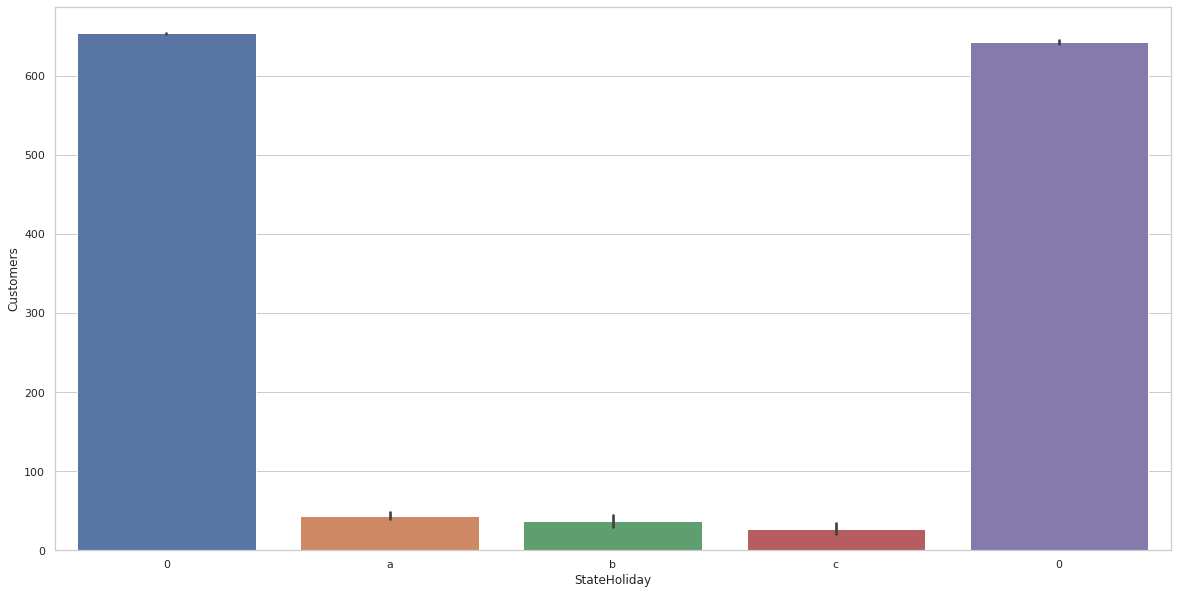

In [310]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='StateHoliday', y ='Customers', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b>
# The minimum number of average customers observed in "Christmas" holiday and the number of customers is 27.

# 10.6. Number of Customers on School Holidays

In [311]:
Rossmann_Sales.groupby('SchoolHoliday')[["Customers"]].count() # Number of Customers on School Holidays

,Customers
SchoolHoliday,
0,835488
1,181721


In [312]:
Rossmann_Sales.groupby('SchoolHoliday')[["Customers"]].mean() # Number of average Customers on School Holidays

,Customers
SchoolHoliday,
0,617.645174
1,704.412941


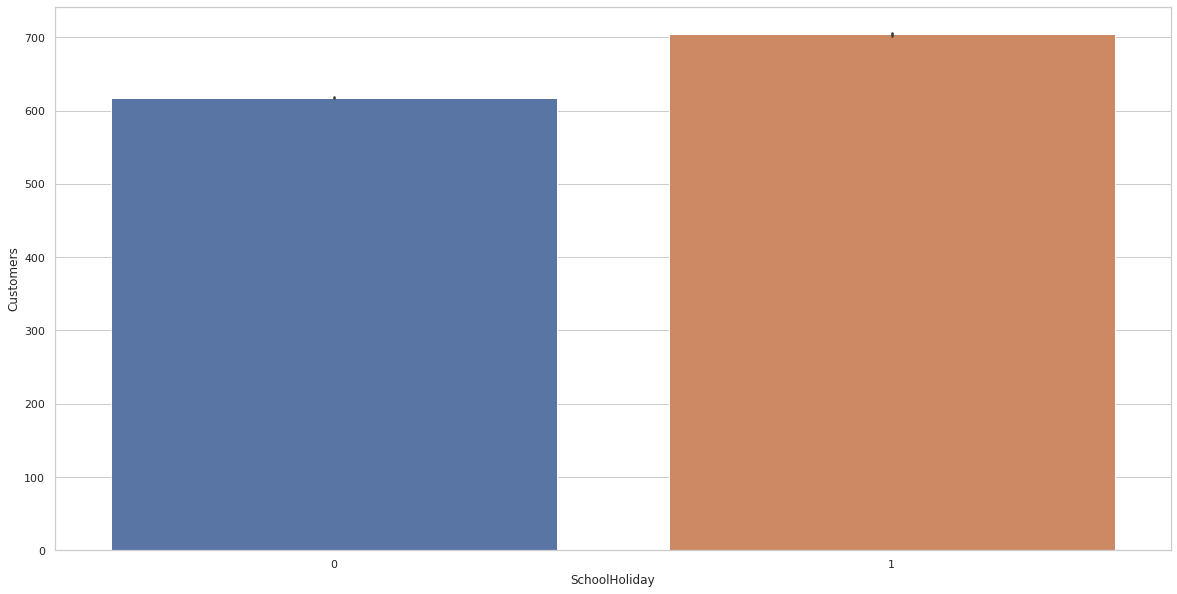

In [313]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='SchoolHoliday', y ='Customers', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b>
# The number of customers on school holiday is on average 704 where the number of customers on normal day is on average 617.

# 10.7.Customers on different kind of Store types

In [314]:
Rossmann_Sales.groupby('StoreType')[["Customers"]].count() # Number of Customers on different kind of Store types

,Customers
StoreType,
a,551627
b,15830
c,136840
d,312912


In [315]:
Rossmann_Sales.groupby('StoreType')[["Customers"]].mean() #  Number of Average Customers on different kind of Storet types

,Customers
StoreType,
a,659.034880
b,1987.720846
c,673.265894
d,501.434892


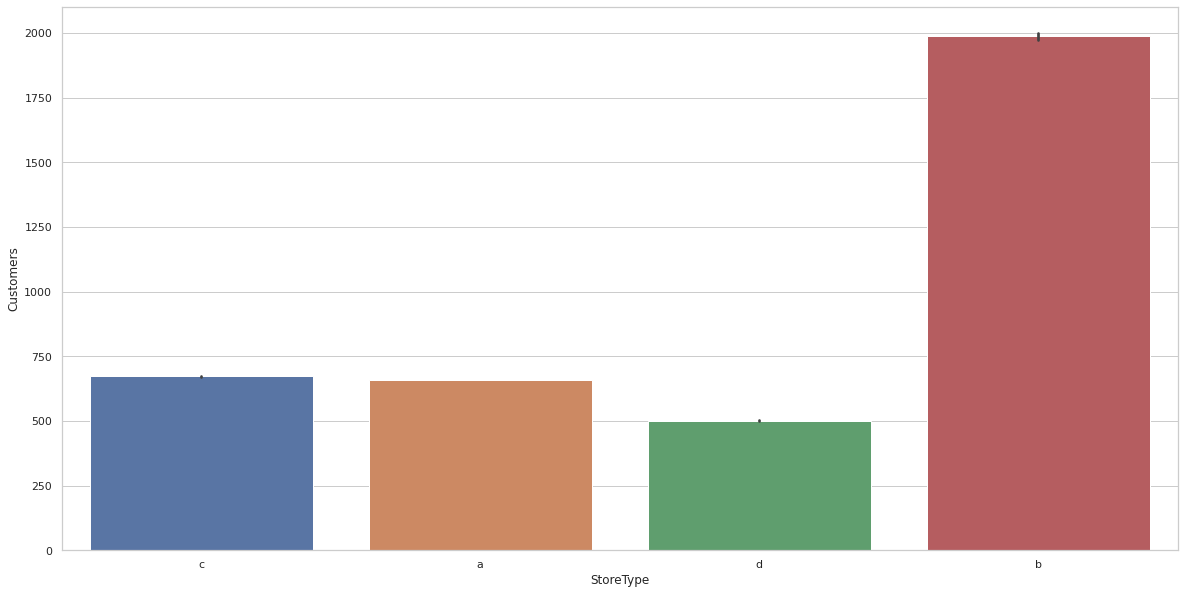

In [316]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='StoreType', y ='Customers', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b>
# In average highest number of customers observed in the store type "b" and the number of customers is 1987.

# 10.8. Customers on different Assortments

In [317]:
Rossmann_Sales.groupby('Assortment')[["Customers"]].count() # Number of customers on different Assortments

,Customers
Assortment,
a,537445
b,8294
c,471470


In [318]:
Rossmann_Sales.groupby('Assortment')[["Customers"]].mean() #  Number of Average customers on different Assortments

,Customers
Assortment,
a,619.164636
b,2046.361828
c,624.222733


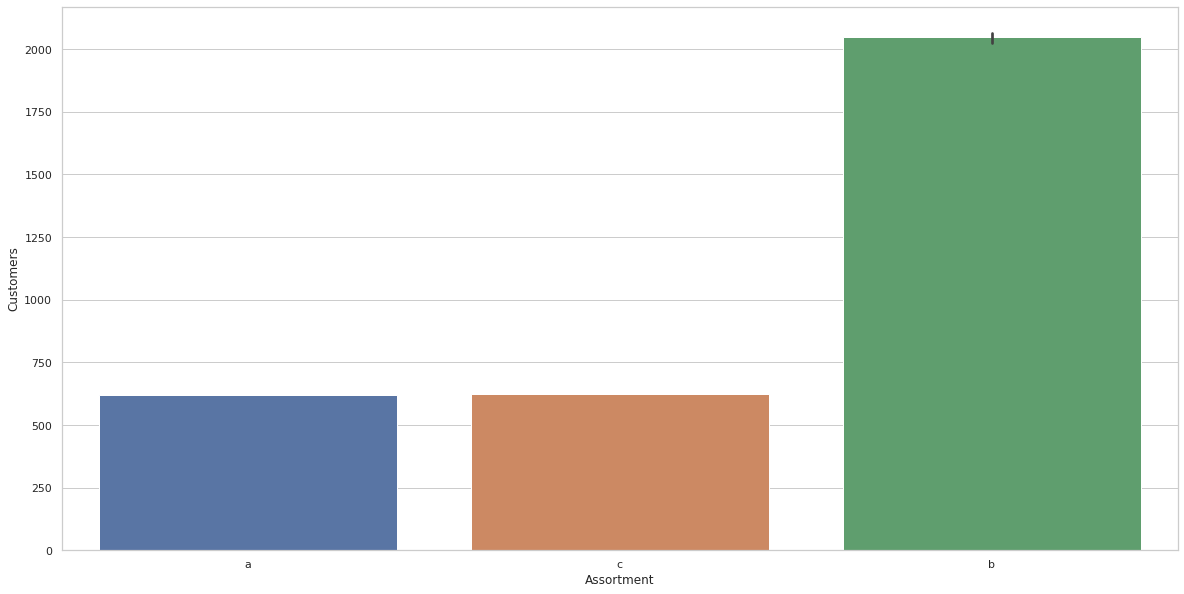

In [319]:
# Visualizations

plt.figure(figsize = (20,10))
sns.barplot(x ='Assortment', y ='Customers', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b>
# In average the highest number of customers buy the assortment type "b", and the number of customers is 2046.

# <b><center>11. Promo </b></center>

# 11.1. Showing How Many Stores Giving Promo Or Not

In [320]:
Rossmann_Sales.groupby('Promo2')[["StoreType"]].count() # Showing How Many Stores Giving Promo Or Not

,StoreType
Promo2,
0,508031
1,509178


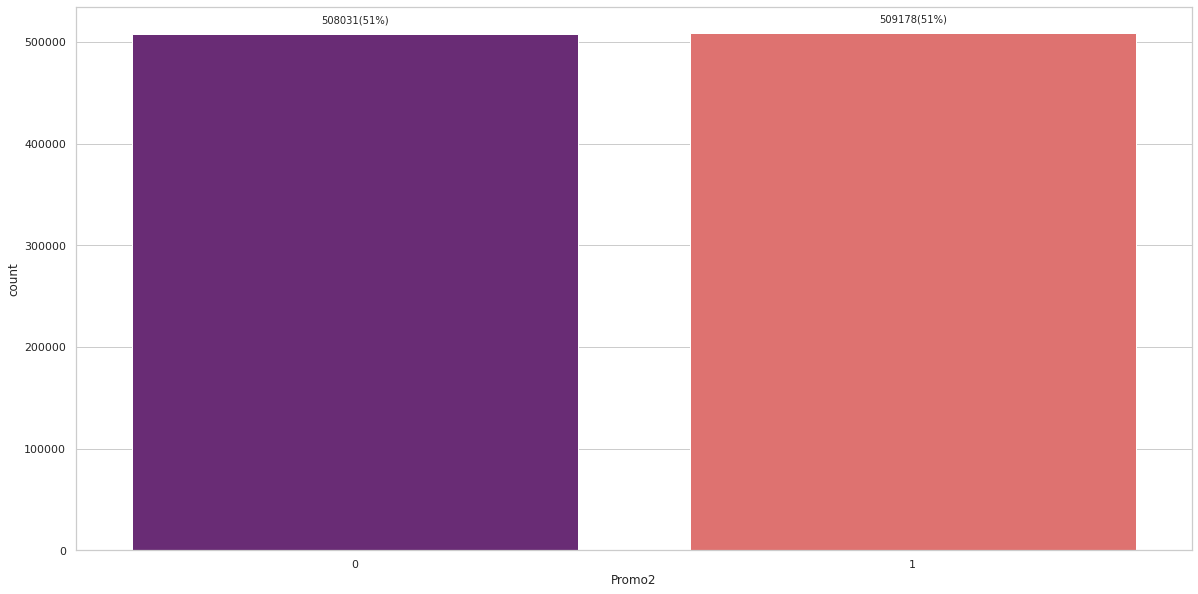

In [321]:
# Visualizations

plt.figure(figsize = (20,10))
ax = sns.countplot(Rossmann_Sales['Promo2'],palette="magma")
for p in ax.patches: # for showing percentage value
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}({height*0.0001:.0f}%)', (x + width/2, y + height*1.02), ha='center')
        

# <b><u>Conclusion</u> :</b>
# Here we see that almost 50% of stores giving Promo and other 50% of stores are not giving Promo. 

# 11.2. Effect of Promo on Sales

In [322]:
Rossmann_Sales.groupby('Promo')[["Sales"]].count() # Effect of Promo on Sales

,Sales
Promo,
0,629129
1,388080


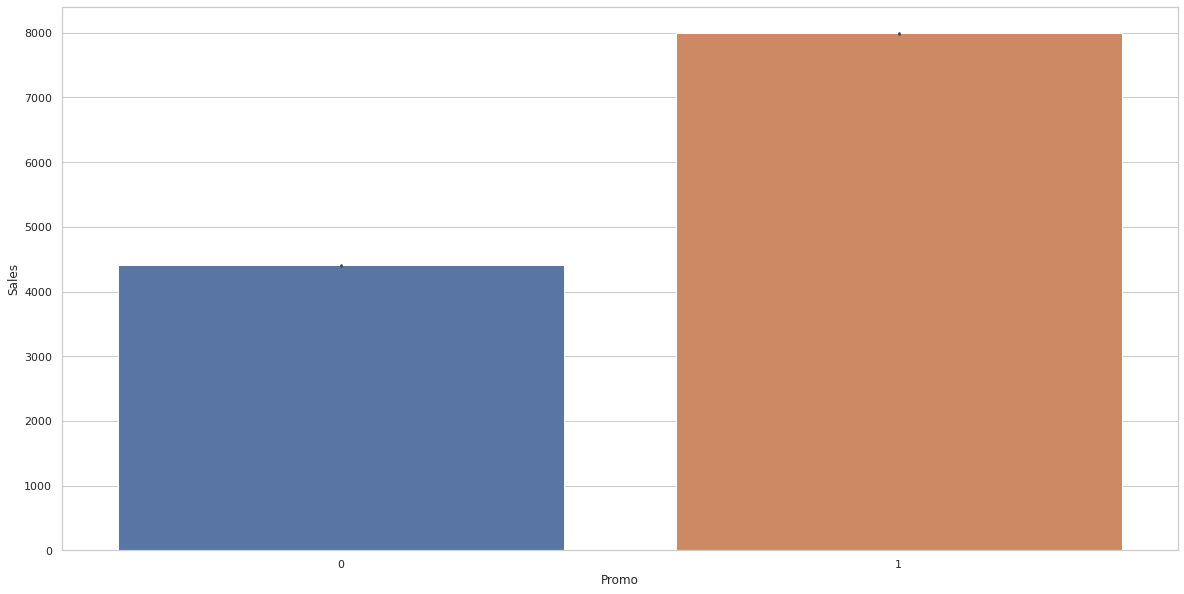

In [323]:
# Visualization

plt.figure(figsize = (20,10))
sns.barplot(x ='Promo', y ='Sales', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b>
# Here we see that when the store gives Promo , the sales will be around 8000 euro where , in a normal day the sale is only around 4500 euro. 

# 11.3. Effect of Promo on Customers

In [324]:
Rossmann_Sales.groupby('Promo')[["Customers"]].count() # Effect of Promo on Sales

,Customers
Promo,
0,629129
1,388080


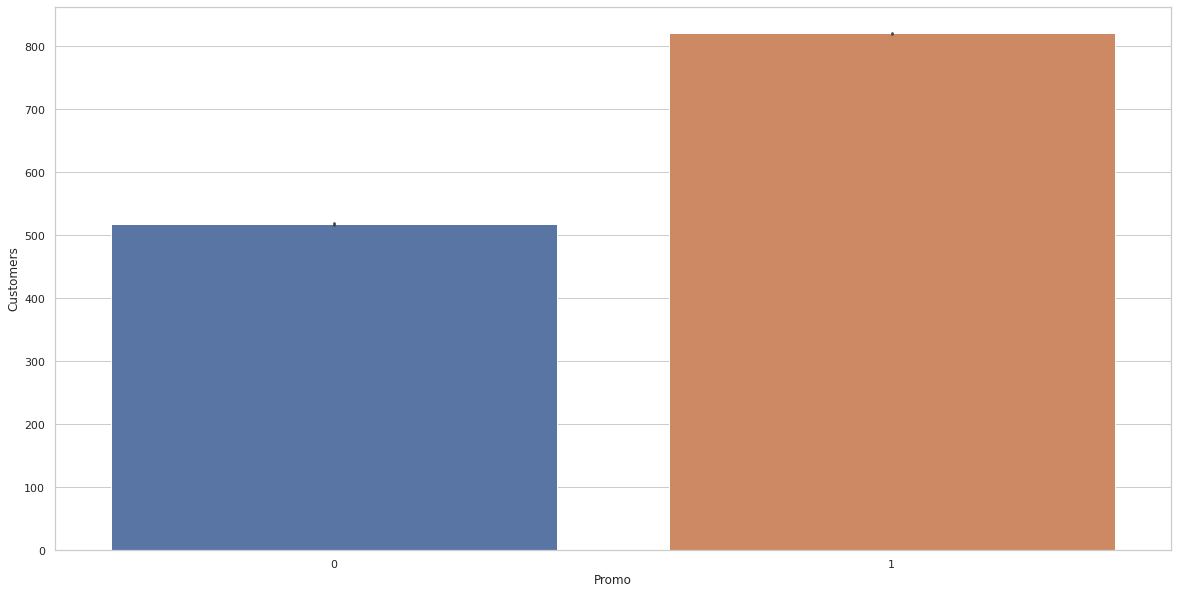

In [325]:
# Visualizations

plt.figure(figsize = (20,10))
sns.barplot(x ='Promo', y ='Customers', data = Rossmann_Sales)

# <b><u>Conclusion</u> :</b>
# Here we see that when the store gives Promo , the number of customers around 800 where , in a normal day the number of customers is only around 520.

# 11.4. Effect of Promo on Sales on Day of Week

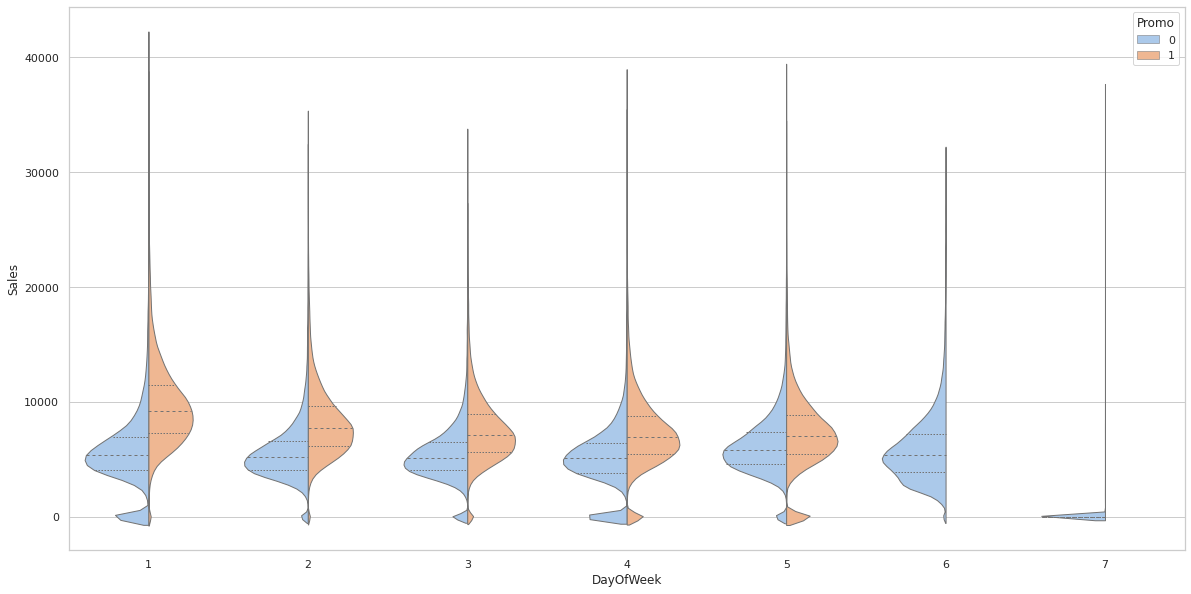

In [326]:
# Effect of Promo on Sales on Day of Week

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.violinplot(data= Rossmann_Sales,x = "DayOfWeek", y= "Sales", hue = "Promo",split = True, inner = "quart", linewidth = 1, palette = "pastel")

# <b><u>Conclusion</u> :</b>
# In this violin plot we see that the sale will be high when there is Promo. On weekend there is no such store who gives Promo. Maximum sale with and without Promo observed on Monday.

# 11.5. Effect of Promo on Customers on Day of Week

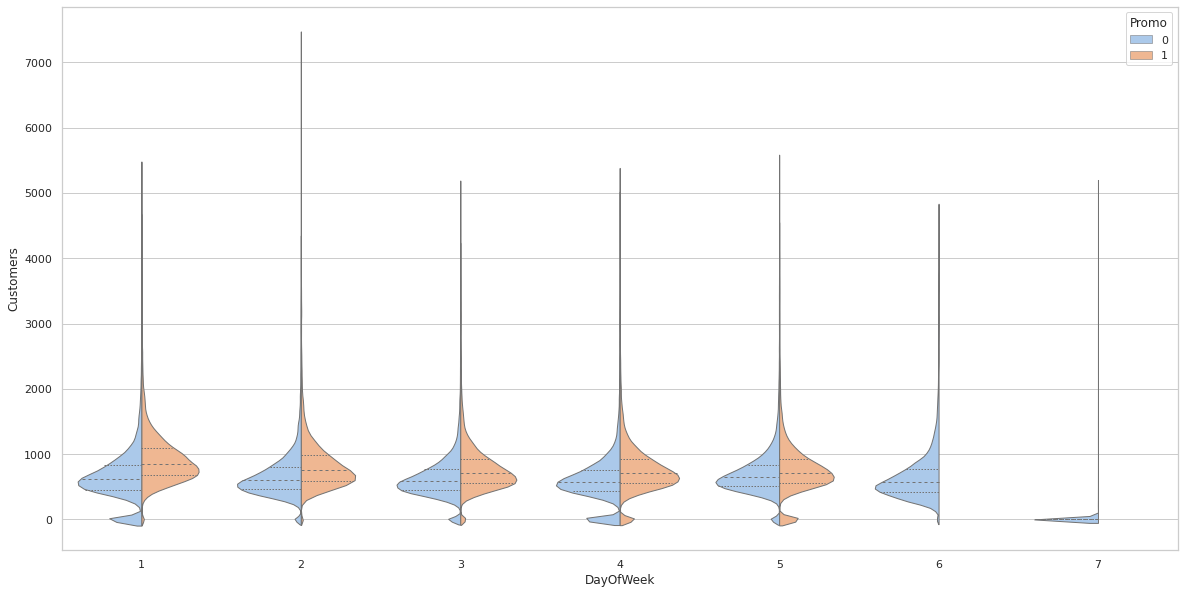

In [327]:
# Effect of Promo on Customers on Day of Week

plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.violinplot(data= Rossmann_Sales,x = "DayOfWeek", y= "Customers", hue = "Promo",split = True, inner = "quart", linewidth = 1, palette = "pastel")

# <b><u>Conclusion</u> :</b>
# In this violin plot we see that the number of customers  will be high when there is Promo. On weekend there is no such store who gives Promo. Maximum number of customers with and without Promo observed on Monday.

# <b> <center>12. Store Type & Assortment </center></b>

# 12.1. Count Of Each Types Of Store

Text(0.5, 1.0, 'Counts of Each Store Types')

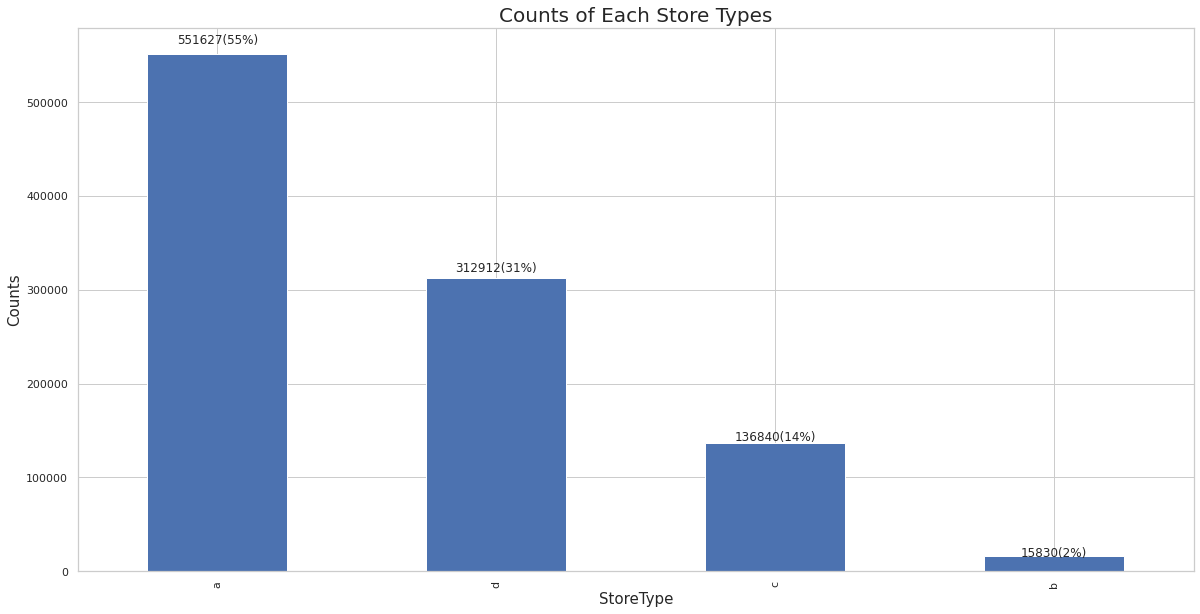

In [328]:
# Count Of Each Types Of Store

plt.figure(figsize = (20,10))
ax = Rossmann_Sales['StoreType'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

for p in ax.patches: # for showing percentage value
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}({height*0.0001:.0f}%)', (x + width/2, y + height*1.02), ha='center')

ax.set_xlabel('StoreType',size = 15)
ax.set_ylabel('Counts',size = 15)
plt.title('Counts of Each Store Types',size = 20)



# <b><u>Conclusion</u> :</b>
# In our data set count of maximum number of store type is "a", and the minimum number of store type is "b".

# 12.2. Count Of Each Types Of Assortment

Text(0.5, 1.0, 'Counts of Each Store Types')

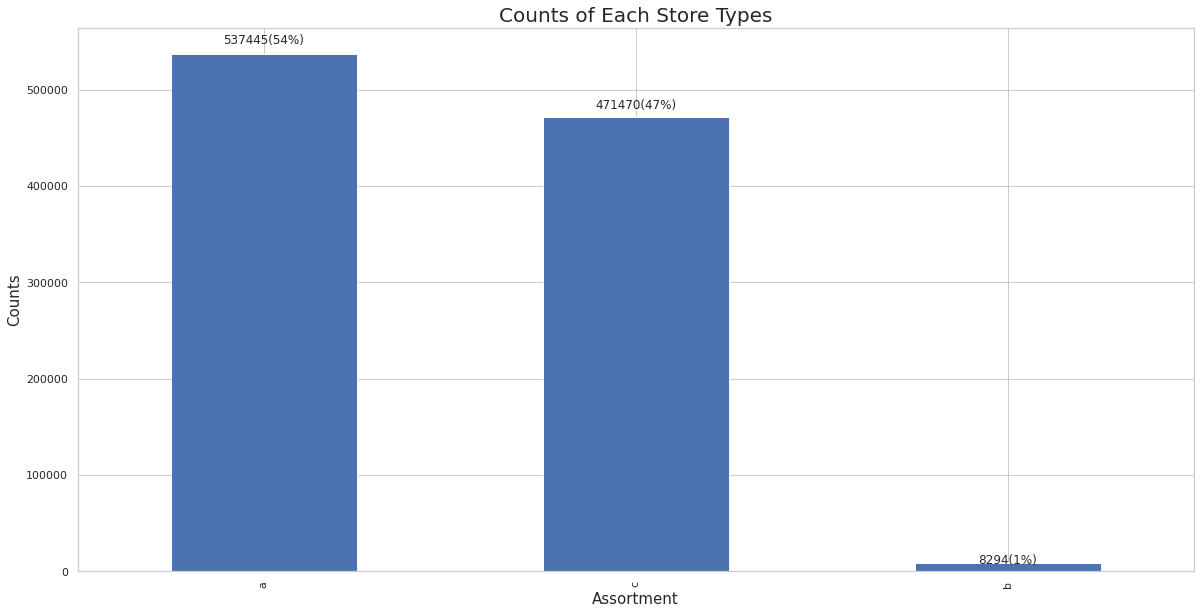

In [329]:
# Count Of Each Types Of Assortment

plt.figure(figsize = (20,10))
ax = Rossmann_Sales['Assortment'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}({height*0.0001:.0f}%)', (x + width/2, y + height*1.02), ha='center')

ax.set_xlabel('Assortment',size = 15)
ax.set_ylabel('Counts',size = 15)
plt.title('Counts of Each Store Types',size = 20)

# <b><u>Conclusion</u> :</b>
# In our data set count of maximum number of assortment type is "a", and the minimum number of assortment type is "b".

# 12.3. Count of Each Kind of Assortment on Each Store Types 

In [330]:
Rossmann_Sales.groupby("StoreType")[["Assortment"]].count() # Count of total amount of Assortment on Each Store Types

,Assortment
StoreType,
a,551627
b,15830
c,136840
d,312912


Text(0.5, 1.0, 'Number of Different Assortments per Store Type')

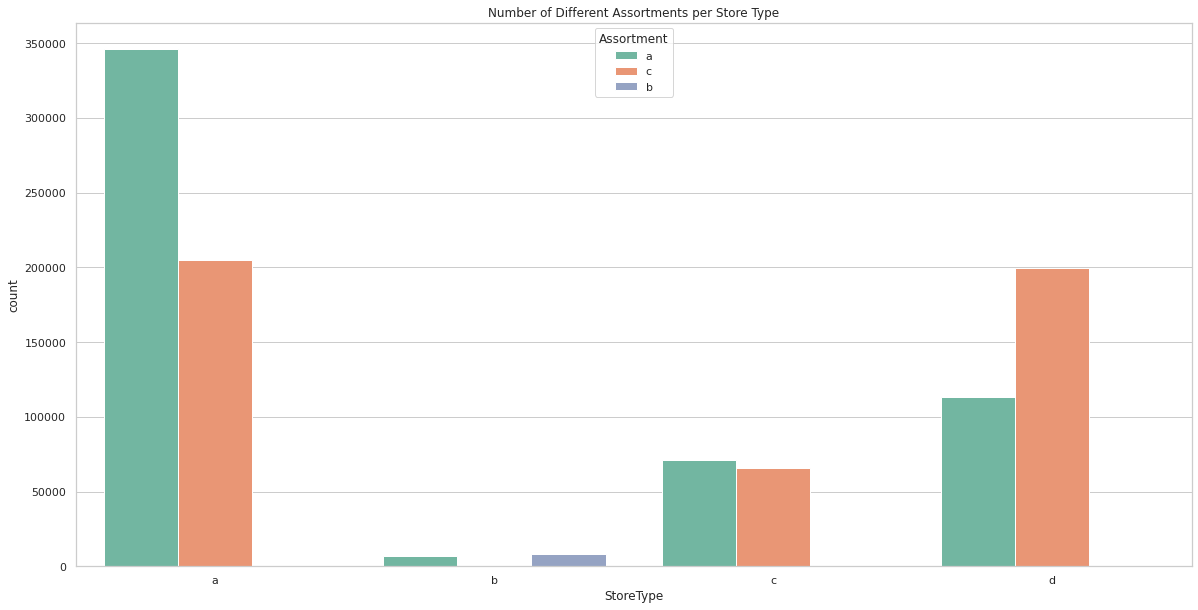

In [331]:
# Count of Each Kind of Assortment on Each Store Types

plt.figure(figsize=(20,10))
sns.countplot(data=Rossmann_Sales,x="StoreType",hue="Assortment",order=["a","b","c","d"], palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")


# <b><u>Conclusion</u> :</b>
# From the visualization we see that in store type "a","c", and "d"  have the assortment type "a" and "c" where  in store type "b" have the assortment type "a" and "b". 
#Maximum number of assortment stored in store type "a".

# <b><center> 13. Effect on Sales according to Competition Distance </center></b>

In [332]:
Rossmann_Sales.CompetitionDistance.value_counts()

250.0      11120
350.0       7536
50.0        7536
1200.0      7374
190.0       7352
           ...  
3920.0       758
4460.0       758
13090.0      758
5890.0       758
12870.0      758
Name: CompetitionDistance, Length: 654, dtype: int64

In [333]:
Rossmann_Sales.groupby("CompetitionDistance")[["Sales"]].mean()

,Sales
CompetitionDistance,
20.0,4861.790870
30.0,4659.587470
40.0,6212.659448
50.0,8072.697452
60.0,7816.121373
...,...
45740.0,6646.681529
46590.0,3773.877919
48330.0,4032.547771


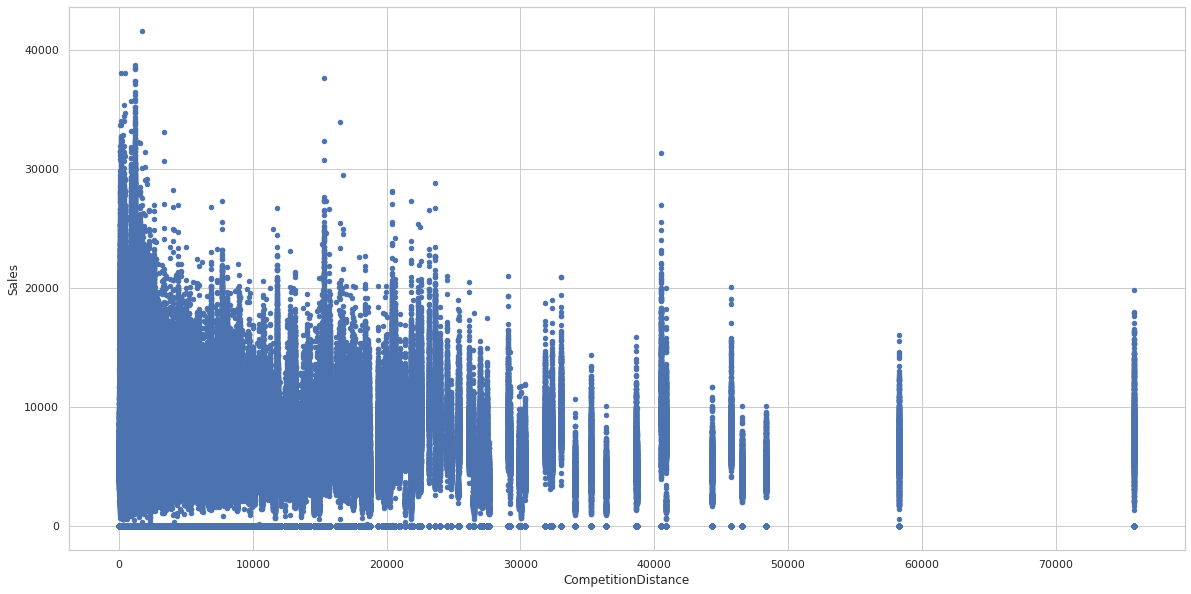

In [334]:
Rossmann_Sales.plot(kind= 'scatter',x='CompetitionDistance',y='Sales',figsize=(20,10))

# <b><u>Conclusion</u> :</b>
# From the scatter plot we conclude that the distance between two shop and sale are directly related. Sale will be high when the distance between two shop is increase. 

# <b> <center> 14. Correlation among the Features</center></b>

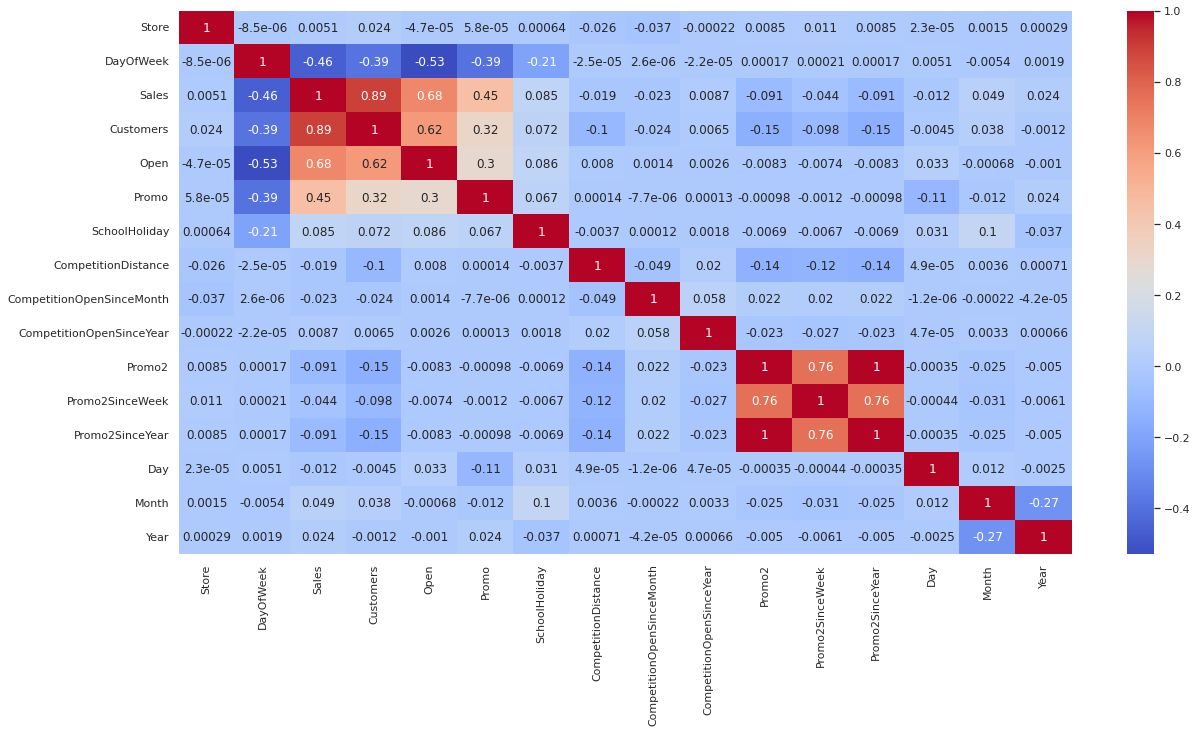

In [335]:
# Heat map

plt.figure(figsize = (20,10))
sns.heatmap(Rossmann_Sales.corr(),cmap="coolwarm", annot= True)

# <b><u>Conclusion</u> :</b>
# From the heat map  we observed that the column "Customers","Promo2","Promo2SinceWeek" and"Promo2SinceYear" are highly correlated. So, for prediction we have to drop those columns. 

# <b><center>Machine Learning</center></b>

In [336]:
# Creating dummy coloumns of store type, assortment and state holiday

Rossmann_Sales = pd.get_dummies(columns = ['StoreType',	'Assortment','StateHoliday'], data = Rossmann_Sales, drop_first = True)

In [337]:
# droping correlated columns 

Rossmann_Sales_Final = Rossmann_Sales.drop(['Sales','Date','CompetitionOpenSinceMonth',"CompetitionOpenSinceYear",'Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis = 1)

In [338]:
Rossmann_Sales_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Customers            1017209 non-null  int64  
 3   Open                 1017209 non-null  int64  
 4   Promo                1017209 non-null  int64  
 5   SchoolHoliday        1017209 non-null  int64  
 6   CompetitionDistance  1017209 non-null  float64
 7   Promo2               1017209 non-null  int64  
 8   Day                  1017209 non-null  int64  
 9   Month                1017209 non-null  int64  
 10  Year                 1017209 non-null  int64  
 11  StoreType_b          1017209 non-null  uint8  
 12  StoreType_c          1017209 non-null  uint8  
 13  StoreType_d          1017209 non-null  uint8  
 14  Assortment_b         1017209 non-null  uint8  
 15

In [339]:
Rossmann_Sales_Final = Rossmann_Sales_Final.astype('int32') # converting data type to int 32 

In [340]:
Rossmann_Sales_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   Store                1017209 non-null  int32
 1   DayOfWeek            1017209 non-null  int32
 2   Customers            1017209 non-null  int32
 3   Open                 1017209 non-null  int32
 4   Promo                1017209 non-null  int32
 5   SchoolHoliday        1017209 non-null  int32
 6   CompetitionDistance  1017209 non-null  int32
 7   Promo2               1017209 non-null  int32
 8   Day                  1017209 non-null  int32
 9   Month                1017209 non-null  int32
 10  Year                 1017209 non-null  int32
 11  StoreType_b          1017209 non-null  int32
 12  StoreType_c          1017209 non-null  int32
 13  StoreType_d          1017209 non-null  int32
 14  Assortment_b         1017209 non-null  int32
 15  Assortment_c         1017209 non

In [341]:
X = Rossmann_Sales_Final.iloc[:,:-1]

In [342]:
Y = Rossmann_Sales['Sales']

In [343]:
# splitting train and test data set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1) 

# Now lets implement 8 models on our dataset : 
# linear regression, lasso regression, ridge regeression, elastic regression, decision tree regression, xgb regressor, random forest regressor and bayesian linear regressor with the accuracy metrics r-squared, adjusted r-squared, root mean squared error and mean absolute percentage error. 

# 1.Linear Regression

In [344]:
lr = LinearRegression()


In [345]:
lr.fit(X_train,Y_train)

LinearRegression()

In [346]:
Y_pred = lr.predict(X_test)

In [347]:
lr_r2 = r2_score(Y_test,Y_pred) # evaluating r2 score 

In [348]:
lr_r2

0.9004521626813957

In [349]:
# evaluating adjusted r2 score

lr_adj_r2 = (1 - (1 - lr_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [350]:
lr_adj_r2

0.9004502053669697

In [351]:
lr_rmse = sqrt(mean_squared_error(Y_test,Y_pred)) # evaluating root mean square error

In [352]:
lr_rmse

1215.5618528519453

In [353]:
lr_mape = mean_absolute_percentage_error(Y_test,Y_pred) # evaluating mean absolute percentage error

In [354]:
lr_mape

4.003459539804636e+17

In [355]:
lr_accuracy = 100 - lr_mape # evaluating accuracy of this model

In [356]:
lr_accuracy

-4.003459539804635e+17

# 2.Lasso Regression

In [357]:
lass = Lasso(alpha = 0.1, max_iter = 2000)

In [358]:
lass.fit(X_train,Y_train)

Lasso(alpha=0.1, max_iter=2000)

In [359]:
prediction_lasso = lass.predict(X_test)

In [360]:
lasso_r2 = r2_score(Y_test,prediction_lasso) # evaluating r2 score

In [361]:
lasso_r2

0.9004518645559217

In [362]:
# evaluating adjusted r2 score

lasso_adj_r2 = (1 - (1 - lasso_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [363]:
lasso_adj_r2

0.900449907235634

In [364]:
lasso_rmse = sqrt(mean_squared_error(Y_test,prediction_lasso)) # evaluating root mean square error

In [365]:
lasso_rmse

1215.5636730305241

In [366]:
lasso_mape = mean_absolute_percentage_error(Y_test,prediction_lasso) # evaluating mean absolute percentage error

In [367]:
lasso_mape

4.003317561793797e+17

In [368]:
lasso_accuracy = 100-lasso_mape # evaluating accuracy of this model

In [369]:
lasso_accuracy

-4.003317561793796e+17

# 3.Ridge Regression

In [370]:
ridge = Ridge(alpha = 0.1, max_iter = 2000)

In [371]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1, max_iter=2000)

In [372]:
prediction_ridge = ridge.predict(X_test)

In [373]:
ridge_r2 = r2_score(Y_test,prediction_ridge) # evaluating r2 score

In [374]:
ridge_r2

0.9004521662900413

In [375]:
# evaluating adjusted r2 score

ridge_adj_r2 = (1 - (1 - ridge_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [376]:
ridge_adj_r2

0.9004502089756863

In [377]:
ridge_rmse = sqrt(mean_squared_error(Y_test,prediction_ridge)) # evaluating root mean square error

In [378]:
ridge_rmse

1215.5618308196633

In [379]:
ridge_mape = mean_absolute_percentage_error(Y_test,prediction_ridge) # evaluating mean absolute percentage error

In [380]:
ridge_mape

4.00345794428075e+17

In [381]:
ridge_accuracy = 100- ridge_mape # evaluating accuracy of this model

In [382]:
ridge_accuracy

-4.003457944280749e+17

# 4.Elastic Regression

In [383]:
elas = ElasticNet(alpha = 0.1, max_iter = 2000)

In [384]:
elas.fit(X_train,Y_train)

ElasticNet(alpha=0.1, max_iter=2000)

In [385]:
prediction_elas = elas.predict(X_test)

In [386]:
elas_r2 = r2_score(Y_test,prediction_elas) # evaluating r2 score

In [387]:
elas_r2

0.8830142763359033

In [388]:
# evaluating adjusted r2 score

elas_adj_r2 = (1 - (1 - elas_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [389]:
elas_adj_r2

0.8830119761569066

In [390]:
elas_rmse = sqrt(mean_squared_error(Y_test,prediction_elas)) # evaluating root mean square error

In [391]:
elas_rmse

1317.7334812194147

In [392]:
elas_mape = mean_absolute_percentage_error(Y_test,prediction_elas) # evaluating mean absolute percentage error

In [393]:
elas_mape

3.626878270630387e+17

In [394]:
elas_accuracy = 100 - elas_mape # evaluating accuracy of this model

In [395]:
elas_accuracy

-3.626878270630386e+17

# 5.Decision Tree Regression with Cross Validation

In [396]:
des_regressor = DecisionTreeRegressor(random_state=10)
cross_val_score(des_regressor, X_train, Y_train, cv=10).mean()

0.9705631458254427

In [397]:
des_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=10)

In [398]:
Y_pred_des = des_regressor.predict(X_test)

In [399]:
des_r2 = r2_score(Y_test,Y_pred_des) # evaluating r2 score

In [400]:
des_r2

0.9708808532942137

In [401]:
# evaluating adjusted r2 score

des_adj_r2 = (1 - (1 - des_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [402]:
des_adj_r2

0.9708802807521328

In [403]:
des_rmse = sqrt(mean_squared_error(Y_test,Y_pred_des)) # evaluating root mean square error

In [404]:
des_rmse

657.431441067353

In [405]:
des_mape = mean_absolute_percentage_error(Y_test,Y_pred_des) # evaluating mean absolute percentage error

In [406]:
des_mape

0.05713599080995376

In [407]:
des_accuracy = 100 - des_mape # evaluating accuracy of this model

In [408]:
des_accuracy

99.94286400919005

# 6.XGB Regressor

In [409]:
xgbr = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [410]:
xgbr.fit(X_train, Y_train)

[06:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [411]:
Y_pred_xgb = xgbr.predict(X_test)

In [412]:
xgb_r2 = r2_score(Y_test,Y_pred_xgb) # evaluating r2 score

In [413]:
xgb_r2

0.8579563107092469

In [414]:
# evaluating adjusted r2 score

xgb_adj_r2 = (1 - (1 - xgb_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [415]:
xgb_adj_r2

0.8579535178393096

In [416]:
xgb_rmse = sqrt(mean_squared_error(Y_test,Y_pred_xgb)) # evaluating root mean square error

In [417]:
xgb_rmse

1452.0183993579863

In [418]:
xgb_mape = mean_absolute_percentage_error(Y_test,Y_pred_xgb) # evaluating mean absolute percentage error

In [419]:
xgb_mape

51481053307331.89

In [420]:
xgb_accuracy = 100 - xgb_mape # evaluating accuracy of this model

In [421]:
xgb_accuracy

-51481053307231.89

# 7.Random Forest Regressor

In [422]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [423]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [424]:
Y_pred_rf = rf.predict(X_test)

In [425]:
rf_r2 = r2_score(Y_test,Y_pred_rf) # evaluating r2 score

In [426]:
rf_r2

0.8493965227155018

In [427]:
# evaluating adjusted r2 score

rf_adj_r2 = (1 - (1 - rf_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [428]:
rf_adj_r2

0.849393561542596

In [429]:
rf_rmse = sqrt(mean_squared_error(Y_test,Y_pred_rf)) # evaluating root mean square error

In [430]:
rf_rmse

1495.1289386382598

In [431]:
rf_mape = mean_absolute_percentage_error(Y_test,Y_pred_rf) # evaluating mean absolute percentage error

In [432]:
rf_mape

5734575133173.4

In [433]:
rf_accuracy = 100 - rf_mape # evaluating accuracy of this model

In [434]:
rf_accuracy

-5734575133073.4

# 8.Bayesian Linear Regression

In [435]:
bysr = linear_model.BayesianRidge()

In [436]:
bysr.fit(X_train,Y_train)

BayesianRidge()

In [437]:
Y_pred_bysr = bysr.predict(X_test)

In [438]:
bysr_r2 = r2_score(Y_test,Y_pred_bysr) # evaluating r2 score

In [439]:
bysr_r2

0.9004521960450013

In [440]:
# evaluating adjusted r2 score

bysr_adj_r2 = (1 - (1 - bysr_r2) * ((Rossmann_Sales_Final.shape[0] - 1) / (Rossmann_Sales_Final.shape[0] - Rossmann_Sales_Final.shape[1] - 1)))

In [441]:
bysr_adj_r2

0.9004502387312312

In [442]:
bysr_rmse = sqrt(mean_squared_error(Y_test,Y_pred_bysr)) # evaluating root mean square error

In [443]:
bysr_rmse

1215.5616491532476

In [444]:
bysr_mape = mean_absolute_percentage_error(Y_test,Y_pred_bysr) # evaluating mean absolute percentage error

In [445]:
bysr_mape

4.003444680002883e+17

In [446]:
bysr_accuracy = 100 - bysr_mape # evaluating accuracy of this model

In [447]:
bysr_accuracy

-4.003444680002882e+17

# Best Model

In [448]:
model = [['Linear Regression',lr_r2,lr_adj_r2,lr_rmse,lr_mape,lr_accuracy],['Lasso Regression',lasso_r2,lasso_adj_r2,lasso_rmse,lasso_mape,lasso_accuracy],
            ['Ridge Regression',ridge_r2,ridge_adj_r2,ridge_rmse,ridge_mape,ridge_accuracy],['Elastic Regression',elas_r2,elas_adj_r2,elas_rmse,elas_mape,elas_accuracy],
            ['Decision Tree Regression',des_r2,des_adj_r2,des_rmse,des_mape,des_accuracy],['XGB Regression',xgb_r2,xgb_adj_r2,xgb_rmse,xgb_mape,xgb_accuracy],
            ['Random Forest Regressor',rf_r2,rf_adj_r2,rf_rmse,rf_mape,rf_accuracy],['Bayesian Linear Regressor',bysr_r2,bysr_adj_r2,bysr_rmse,bysr_mape,bysr_accuracy]]

In [449]:
# creating a data frame using all accuracy metrics from each models

best_model = pd.DataFrame(model,columns = ['Regression Type','R2 Score','Adjusted R2 Score','Root Mean Square Error','Mean Absolute Percentage Error','Accuracy'])

In [450]:
best_model

,Regression Type,R2 Score,Adjusted R2 Score,Root Mean Square Error,Mean Absolute Percentage Error,Accuracy
0,Linear Regression,0.900452,0.900450,1215.561853,4.003460e+17,-4.003460e+17
1,Lasso Regression,0.900452,0.900450,1215.563673,4.003318e+17,-4.003318e+17
2,Ridge Regression,0.900452,0.900450,1215.561831,4.003458e+17,-4.003458e+17
3,Elastic Regression,0.883014,0.883012,1317.733481,3.626878e+17,-3.626878e+17
4,Decision Tree Regression,0.970881,0.970880,657.431441,5.713599e-02,9.994286e+01
5,XGB Regression,0.857956,0.857954,1452.018399,5.148105e+13,-5.148105e+13
6,Random Forest Regressor,0.849397,0.849394,1495.128939,5.734575e+12,-5.734575e+12
7,Bayesian Linear Regressor,0.900452,0.900450,1215.561649,4.003445e+17,-4.003445e+17


# Now we check the maximum value of R2 score, adjusted R2 score & accuracy and check the minimum value of root mean sqaure error, mean absolute percentage error.

In [451]:
best_model['R2 Score'].idxmax()

4

In [452]:
best_model['Adjusted R2 Score'].idxmax()

4

In [453]:
best_model['Root Mean Square Error'].idxmin()

4

In [454]:
best_model['Mean Absolute Percentage Error'].idxmin()

4

In [455]:
best_model['Accuracy'].idxmax()

4

In [456]:
best_model.iloc[4] # showing the best model

Regression Type                   Decision Tree Regression
R2 Score                                          0.970881
Adjusted R2 Score                                  0.97088
Root Mean Square Error                          657.431441
Mean Absolute Percentage Error                    0.057136
Accuracy                                         99.942864
Name: 4, dtype: object

# Therefore, best regressor model for our Rossmann Sales dataset is "Decision Tree Regression" with 97% variance is predictable which is 0.06% away from the actual values,i.e. the model prediction accuracy is 99.94%. 